In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [284]:
df = pd.read_csv('raw_data.csv')

In [285]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...","5,15 tỷ",100 m2,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...","4,1 tỷ",85 m2,_,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11 tỷ,67 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...","17,5 tỷ",137 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7 tỷ,90 m2,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Address      14941 non-null  object
 1   Prices       14941 non-null  object
 2   Area         14941 non-null  object
 3   toFace       14941 non-null  object
 4   type         14941 non-null  object
 5   certificate  14941 non-null  object
 6   width        14941 non-null  object
 7   length       14941 non-null  object
 8   floors       14941 non-null  object
dtypes: object(9)
memory usage: 1.0+ MB


## Clean Data

### Prices

- Loại bỏ chữ tỷ trong cột prices
- Thay thế dấu ',' trong cột Prices thành dấu '.'
- Những cột nào định dạng sai không phải là số thì chuyển thành NaN

In [287]:
df['Prices'] = df['Prices'].apply(lambda x: x.strip(' tỷ ').replace(' ', ''))
df['Prices'] = df['Prices'].apply(lambda x: x.replace(',', '.'))
df.loc[:,'Prices'] = pd.to_numeric(df['Prices'], errors='coerce')

In [288]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100 m2,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.1,85 m2,_,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.0,67 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.5,137 m2,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.0,90 m2,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


### Area

- Xóa 'm2'
- Những biến Area nào không phải định dạng là số thì chuyển vè NaN

In [289]:
df['Area'] = df['Area'].apply(lambda x: x.strip(' m2 ').replace(' ', '').replace('KXĐ',''))
df.loc[:,'Area'] = pd.to_numeric(df['Area'], errors='coerce')

Những giá trị area nào bằng 0 thì chuyển về NaN

In [290]:
df.loc[df.Area==0,'Area']=np.nan

In [291]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.1,85.0,_,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.0,67.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.5,137.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.0,90.0,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


### toFace

In [292]:
df['toFace'].unique()

array(['Tây Nam', '_', 'Tây', 'Đông Nam', 'Đông', 'Tây Bắc', 'Bắc',
       'Đông Bắc', 'Nam'], dtype=object)

- Chuyển '_' về là 'Không'

In [293]:
df['toFace']=df['toFace'].apply(lambda x : x.replace('_', 'Không'))

In [294]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,---,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.1,85.0,Không,Nhà mặt tiền,---,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.0,67.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.5,137.0,Tây,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.0,90.0,Đông Nam,Nhà mặt tiền,Sổ hồng/ Sổ đỏ,5m,18m,4


### Type

In [295]:
df['type'].unique()

array(['Nhà mặt tiền', 'Nhà trong hẻm'], dtype=object)

### Certificate

Các giá trị của biến Certificate

In [296]:
df['certificate'].unique()

array(['---', 'Sổ hồng/ Sổ đỏ', 'Giấy tờ hợp lệ'], dtype=object)

Thay đổi giá trị '---' thành 'Không có'

Thay đổi giá trị 'Giấy tờ hợp lệ' thành 'Sổ hồng/ Sổ đỏ'

In [297]:
df["certificate"] = df["certificate"].apply(lambda x: 'Không có' if x == "---" else 'Giấy tờ hợp lệ')

In [298]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5m,20m,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.1,85.0,Không,Nhà mặt tiền,Không có,---,---,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.0,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,"3,8m",---,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.5,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,"7,3m",---,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.0,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5m,18m,4


### Width and Length

Loại bỏ các từ thừa

In [299]:
df['width'] = df['width'].apply(lambda x: x.strip(' m ').replace(' ', '').replace(',','.'))
df['width'] = df['width'].astype(str).apply(lambda x: re.sub(r'^\.', '', x)).apply(lambda x: re.sub(r'\D+', '.', x)).apply(lambda x: re.sub(r'\.$', '', x))

In [300]:
df['length'] = df['length'].apply(lambda x: x.strip(' m ').replace(' ', '').replace(',','.'))
df['length'] = df['length'].astype(str).apply(lambda x: re.sub(r'\.$', '', x)).apply(lambda x: re.sub(r'\.{2,}', '.', x))

Những giá trị không phải là số thì Chuyển thành NaN

In [301]:
df.loc[:,'width'] = pd.to_numeric(df['width'], errors='coerce')
df.loc[:,'length'] = pd.to_numeric(df['length'], errors='coerce')

Những giá trị length hoặc width nào bằng 0 thì chuyển thành NaN

In [302]:
df.loc[df.width==0,['width']]=np.nan
df.loc[df.length==0,['length']]=np.nan

In [303]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.1,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.0,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.5,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.0,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4


### Floors

Các giá trị của biến floors

In [304]:
df['floors'].unique()

array(['4', '1', '3', '2', '6', '---', '5', '8', '7', '10', '33', '9',
       '14', '11', '19', '34', '18', '123', '23', '15', '35', '25', '12',
       '17', '20', '28'], dtype=object)

Chuyển những giá trị '---' thành NaN

In [305]:
df.loc[:,'floors'] = pd.to_numeric(df['floors'], errors='coerce')

### Định dạng lại dữ liệu

In [306]:
df.head()

,Address,Prices,Area,toFace,type,certificate,width,length,floors
0,"Đường Hà Mục, Phường Hòa Thọ Đông, Quận Cẩm L...",5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4.0
1,"Đường Thi Sách, Phường Hòa Thuận Tây, Quận Hả...",4.1,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1.0
2,"Đường Ông Ích Khiêm, Phường Tam Thuận, Quận T...",11.0,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3.0
3,"Đường Núi Thành, Phường Hòa Cường Bắc, Quận H...",17.5,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3.0
4,"Đường Trương Văn Hiến, Phường Khuê Mỹ, Quận N...",7.0,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4.0


In [307]:
def convert(df, features,t):
    for feature in features:
        df[feature] = df[feature].astype(t)
features_int = ["floors"]
features_cat = ["type","certificate","toFace"]
features_float =["Prices","Area","width","length"]
convert(df,features_int,"Int64")
convert(df,features_cat,"category")
convert(df,features_float,"float64")

Sau khi định dạng 

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Address      14941 non-null  object  
 1   Prices       14875 non-null  float64 
 2   Area         14791 non-null  float64 
 3   toFace       14941 non-null  category
 4   type         14941 non-null  category
 5   certificate  14941 non-null  category
 6   width        12876 non-null  float64 
 7   length       10830 non-null  float64 
 8   floors       14586 non-null  Int64   
dtypes: Int64(1), category(3), float64(4), object(1)
memory usage: 759.5+ KB


In [309]:
df.describe()

,Prices,Area,width,length,floors
count,14875.000000,14791.000000,12876.000000,10830.000000,14586.0
mean,8.378236,87.218493,5.711354,18.190815,2.744344
std,11.268677,63.940995,5.113937,27.314063,1.995086
min,1.000000,0.103000,2.000000,1.000000,1.0
25%,3.600000,60.000000,4.500000,14.000000,2.0
50%,5.250000,80.000000,5.000000,17.500000,3.0
75%,8.800000,100.000000,5.500000,20.000000,3.0
max,315.000000,950.000000,420.000000,2020.000000,123.0


## Create new Feature

Tách trường Address thành:
- Street (Đường)
- Ward (Phường-Xã)
- District (Quận - Huyện)
- City (Thành Phố)

In [310]:
# df[['Street','Ward','District','City','','','']] = df['Address'].str.split(', ', expand=True)
df['Street']=df['Address'].str.split(', ', expand=True)[0]
df['Ward']=df['Address'].str.split(', ', expand=True)[1]
df['District']=df['Address'].str.split(', ', expand=True)[2]

Loại bỏ các trường "City", "Address" và sắp xếp lại thứ tự các trường

In [311]:
df = df.drop(['Address'], axis=1)
df = df[['Street','Ward','District', 'Prices', 'Area', 'toFace', 'type', 'certificate', 'width', 'length', 'floors']]
df.head()

,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors
0,Đường Hà Mục,Phường Hòa Thọ Đông,Quận Cẩm Lệ,5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4
1,Đường Thi Sách,Phường Hòa Thuận Tây,Quận Hải Châu,4.10,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1
2,Đường Ông Ích Khiêm,Phường Tam Thuận,Quận Thanh Khê,11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3
3,Đường Núi Thành,Phường Hòa Cường Bắc,Quận Hải Châu,17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3
4,Đường Trương Văn Hiến,Phường Khuê Mỹ,Quận Ngũ Hành Sơn,7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4


Loại bỏ những giá trị không phải là quận, huyện ở Đà Nẵng 
    
('Quận Cẩm Lệ', 'Quận Hải Châu', 'Quận Thanh Khê', 'Quận Ngũ Hành Sơn', 'Quận Sơn Trà', 'Quận Liên Chiểu', 'Huyện Hòa Vang') 

In [312]:
df['District']= df['District'].str.lower()
District = ['quận cẩm lệ', 'quận hải châu', 'quận thanh khê',
       'quận ngũ hành sơn', 'quận sơn trà', 'quận liên chiểu','huyện hòa vang']
df = df.loc[df['District'].isin(District)]
df.loc[:,'District'] = df['District'].str.replace("quận ","")
df.loc[:,'District'] = df['District'].str.replace("huyện ","")

In [313]:
df.loc[:,'Ward'] = df['Ward'].str.replace("Phường ","")
df.loc[:,'Street'] = df['Street'].str.replace("Đường ","")

In [314]:
df['District'].unique()

array(['cẩm lệ', 'hải châu', 'thanh khê', 'ngũ hành sơn', 'sơn trà',
       'liên chiểu', 'hòa vang'], dtype=object)

Thêm một trường Location theo Address của ngôi nhà

Sử dụng API của BingMap để lấy latitude, Longitude theo địa chỉ của ngôi nhà

In [315]:
import requests

# Địa chỉ cần tìm tọa độ
address = "Đường Huyền Trân Công Chúa, Ngũ Hành Sơn, Đà Nẵng, Việt Nam"

# Tạo URL request
url = "https://dev.virtualearth.net/REST/v1/Locations"

# Gửi yêu cầu HTTP
def getLocation(Address):
    params = {
        "q": Address,
        "key": "AuCD3WhuOOT5HhbRcvJAt1DyK293gMNSAfPSTcgaXGlrVlVTRpXs06BWdTexjaOA"
    }
    response = requests.get(url, params=params)
    data = response.json()
    # Kiểm tra xem có kết quả tọa độ hay không
    if "resourceSets" in data and len(data["resourceSets"]) > 0 and "resources" in data["resourceSets"][0] and len(data["resourceSets"][0]["resources"]) > 0:
        coordinates = data["resourceSets"][0]["resources"][0]["point"]["coordinates"]
        latitude = coordinates[0]
        longitude = coordinates[1]
        location = str(latitude)+","+str(longitude)
        return location
    else:
        return np.nan


In [316]:
# Address = df['Street']+', '+df['District']+', Đà Nẵng, Việt Nam'
# df['Location']=Address.apply(lambda x: getLocation(x))
# df.to_csv('clean_data.csv')

In [317]:
df = pd.read_csv('clean_data2.csv')

In [318]:
df.head()

,Unnamed: 0,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors,Location,Latitude,Longitude,DistanceToCenter,DistanceToBeach
0,0,Hà Mục,Hòa Thọ Đông,cẩm lệ,5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4.0,"16.01918,108.19537",16.01918,108.19537,5.750916,7.862720
1,1,Thi Sách,Hòa Thuận Tây,hải châu,4.10,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1.0,"16.0546,108.20547",16.05460,108.20547,2.389182,4.683770
2,2,Ông Ích Khiêm,Tam Thuận,thanh khê,11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3.0,"16.06653,108.2142",16.06653,108.21420,1.465144,3.435286
3,3,Núi Thành,Hòa Cường Bắc,hải châu,17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3.0,"16.03194,108.22279",16.03194,108.22279,3.281117,4.948860
4,4,Trương Văn Hiến,Khuê Mỹ,ngũ hành sơn,7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4.0,"16.01947,108.25592",16.01947,108.25592,5.590678,5.759550


Tạo thêm 2 trường 
- DistanceToCenter (Khoảng cách đến trung tâm thành phố)
- DistanceToBeach (Khoảng cách đến biển)

In [319]:
tttp = (16.061203,108.226744)
beach = (16.0704,108.2461)
airport = (16.043889 ,108.199444)
def distance(l1,l2):
    # return (np.sqrt((l1[0]-l2[0])**2+(l1[1]-l2[1])**2)*1000)
    lat1_rad = np.radians(l1[0])
    lon1_rad = np.radians(l1[1])
    lat2_rad = np.radians(l2[0])
    lon2_rad = np.radians(l2[1])

    # Tính khoảng cách
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad
    a = np.sin(delta_lat / 2) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(delta_lon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    radius = 6371  # Bán kính trái đất (đơn vị: kilômét)
    distance = radius * c
    return distance

df['Latitude'] = (df['Location'].str.split(',',expand=True)[0])
df['Longitude'] = df['Location'].str.split(',',expand=True)[1]

In [320]:
df['Latitude']=df['Latitude'].astype('float32')
df['Longitude']=df['Longitude'].astype('float32')
df['DistanceToCenter'] = distance(tttp,(np.float64(df['Latitude']),np.float64(df['Longitude'])))
df['DistanceToBeach']= distance(beach,(np.float64(df['Latitude']),np.float64(df['Longitude'])))

In [321]:
df.head()

,Unnamed: 0,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors,Location,Latitude,Longitude,DistanceToCenter,DistanceToBeach
0,0,Hà Mục,Hòa Thọ Đông,cẩm lệ,5.15,100.0,Tây Nam,Nhà mặt tiền,Không có,5.0,20.0,4.0,"16.01918,108.19537",16.01918,108.195374,5.750916,7.862720
1,1,Thi Sách,Hòa Thuận Tây,hải châu,4.10,85.0,Không,Nhà mặt tiền,Không có,NaN,NaN,1.0,"16.0546,108.20547",16.05460,108.205467,2.389182,4.683770
2,2,Ông Ích Khiêm,Tam Thuận,thanh khê,11.00,67.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,3.8,NaN,3.0,"16.06653,108.2142",16.06653,108.214203,1.465144,3.435286
3,3,Núi Thành,Hòa Cường Bắc,hải châu,17.50,137.0,Tây,Nhà mặt tiền,Giấy tờ hợp lệ,7.3,NaN,3.0,"16.03194,108.22279",16.03194,108.222794,3.281117,4.948860
4,4,Trương Văn Hiến,Khuê Mỹ,ngũ hành sơn,7.00,90.0,Đông Nam,Nhà mặt tiền,Giấy tờ hợp lệ,5.0,18.0,4.0,"16.01947,108.25592",16.01947,108.255920,5.590678,5.759550


## Mising Data

Thay thế giá trị trống của trường Prices, Area, floors bằng mean

In [322]:
df['Prices']=df['Prices'].fillna(df['Prices'].mean())
df['Area']=df['Area'].fillna(df['Area'].mean())
df['floors']=df['floors'].fillna(int(df['floors'].mean()))


Trường Width và Length

- Nếu giá trị width khác rỗng và length là rỗng thì: length = area/width
- Ngược lại thì: width = area/length
- Cả hai là rỗng thì length = width = sqrt(area)

In [323]:
df.loc[(df.width.isnull()) & (df.length.notnull()),['width']] = (df['Area'])/(df['length'])
df.loc[(df.width.notnull()) & (df.length.isnull()),['length']] = (df['Area'])/(df['width'])
df.loc[(df.width.isnull()) & (df.length.isnull()),['width','length']] = np.sqrt(df['Area'])

## Feature Selection (QKhang)

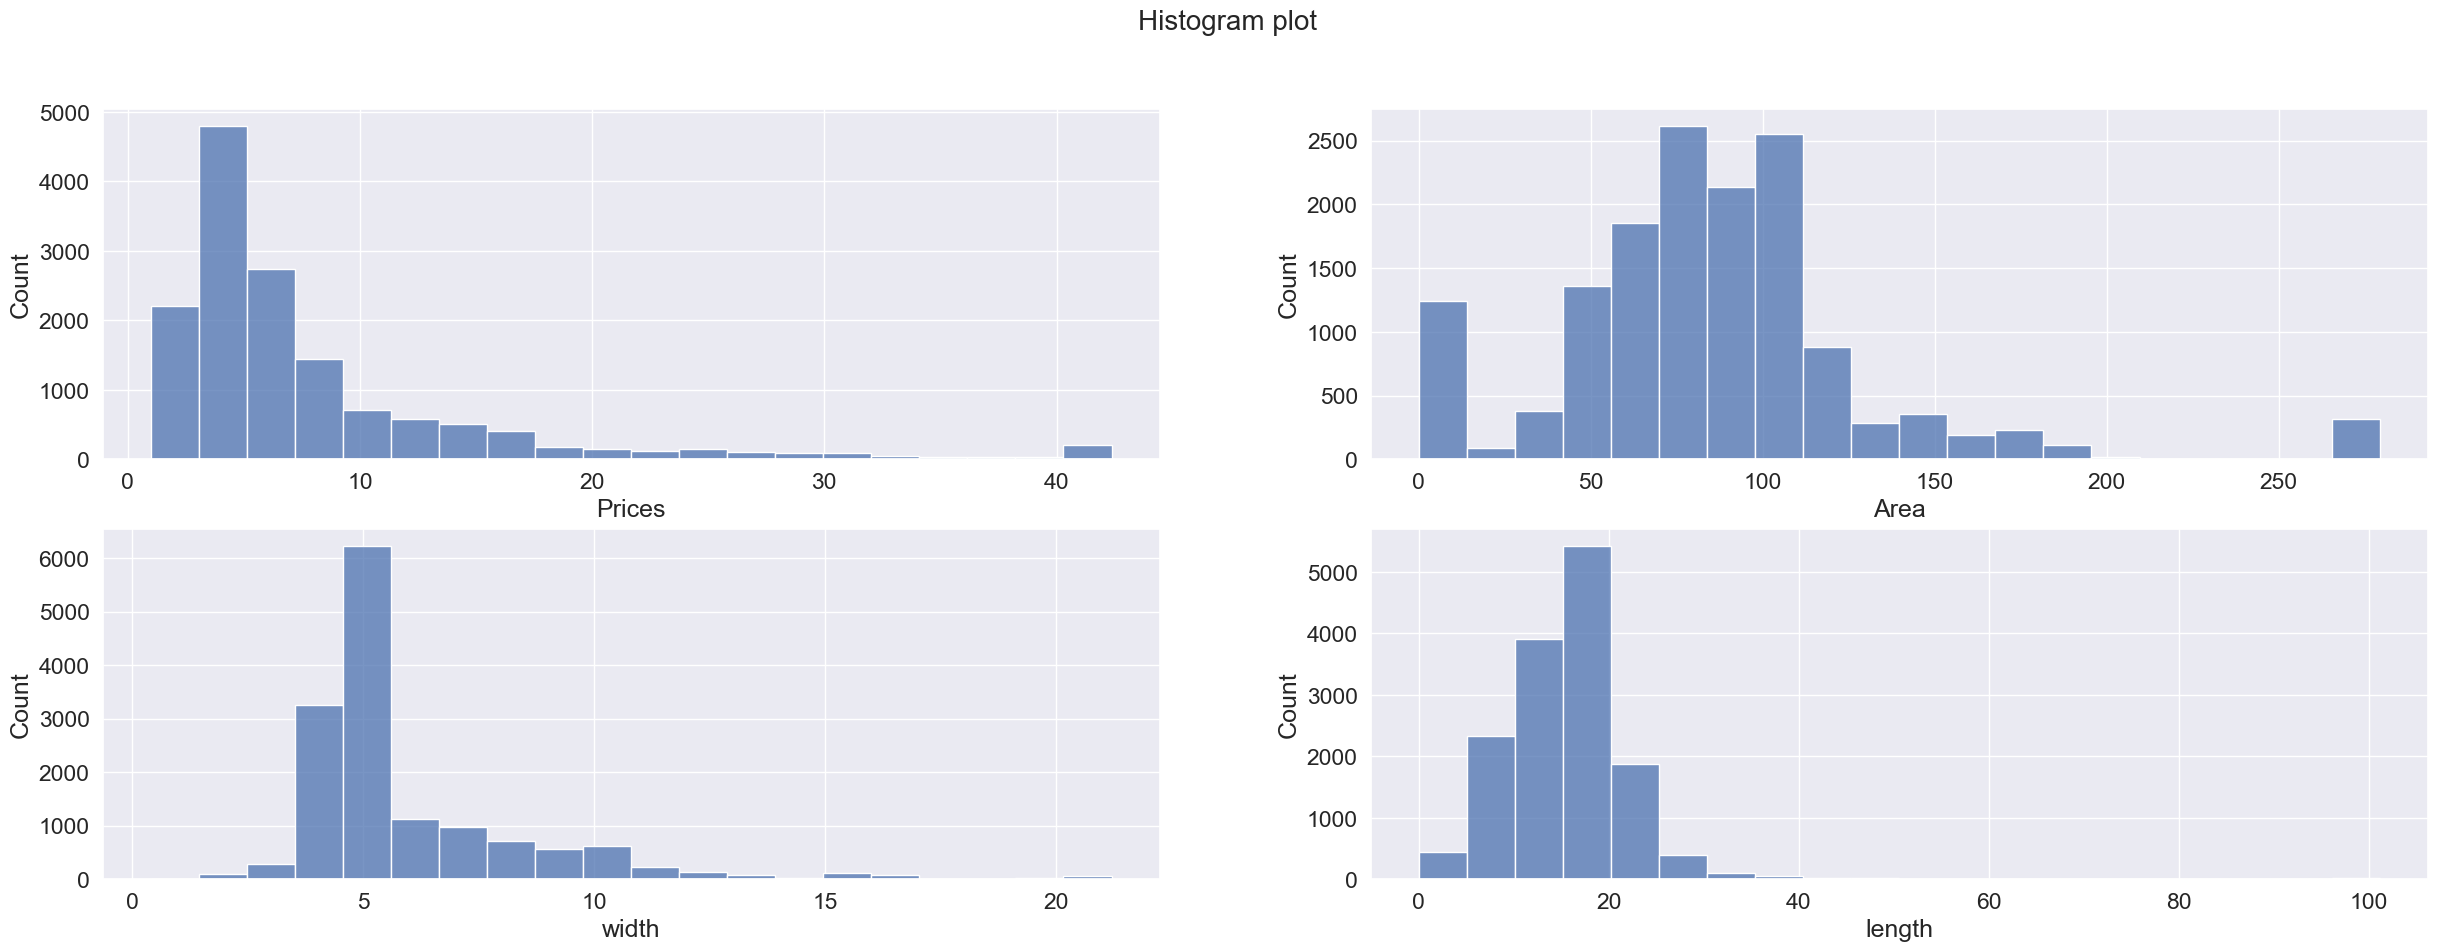

In [324]:
NummericData = ['Prices','Area','width','length']
fig = plt.figure(figsize = (30,10))
fig.suptitle("Histogram plot", fontsize = 20)
for i in enumerate(NummericData):
    axe = fig.add_subplot(2,2, i[0]+1)
    sns.histplot(x=df[i[1]], ax = axe, bins=20)

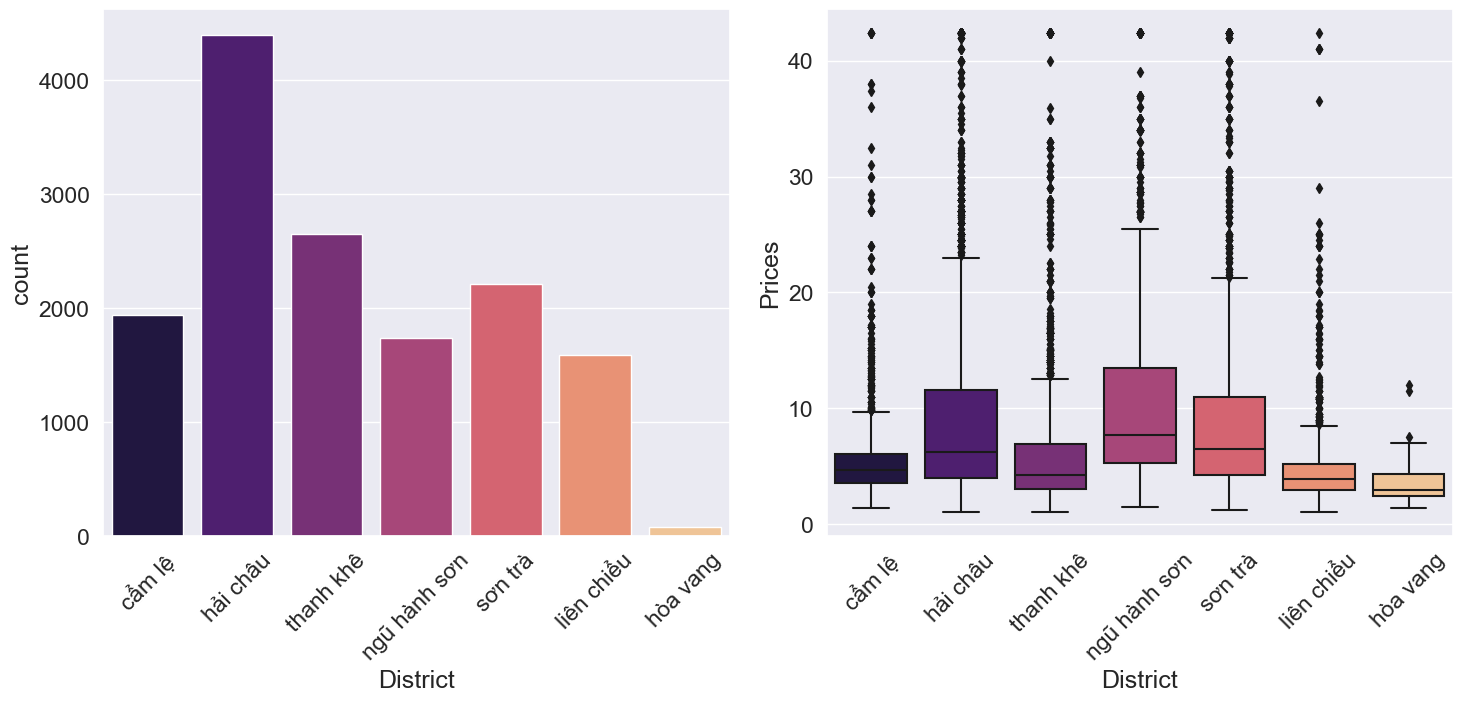

In [325]:
def plot_count(x,fig):
    plt.subplot(3,2,fig)
    ax1 = sns.countplot(x=df[x],palette=("magma"))
    ax1.set_xticklabels(df[x].unique(), rotation = 45)
    plt.subplot(3,2,(fig+1))
    ax2 = sns.boxplot(x=df[x], y=df.Prices, palette=("magma"))
    ax2.set_xticklabels(df[x].unique(), rotation = 45)
    
plt.figure(figsize=(15,20))
plot_count('District', 1)
plt.tight_layout()

Nhận xét:
- Nhận thấy rằng Số lượng nhà ở quận Hải Châu là nhiều nhất

- Giá nhà ở quận Ngũ Hành Sơn là cao nhất

Vì vậy giá nhà và vị trí quận huyện tương quan với nhau

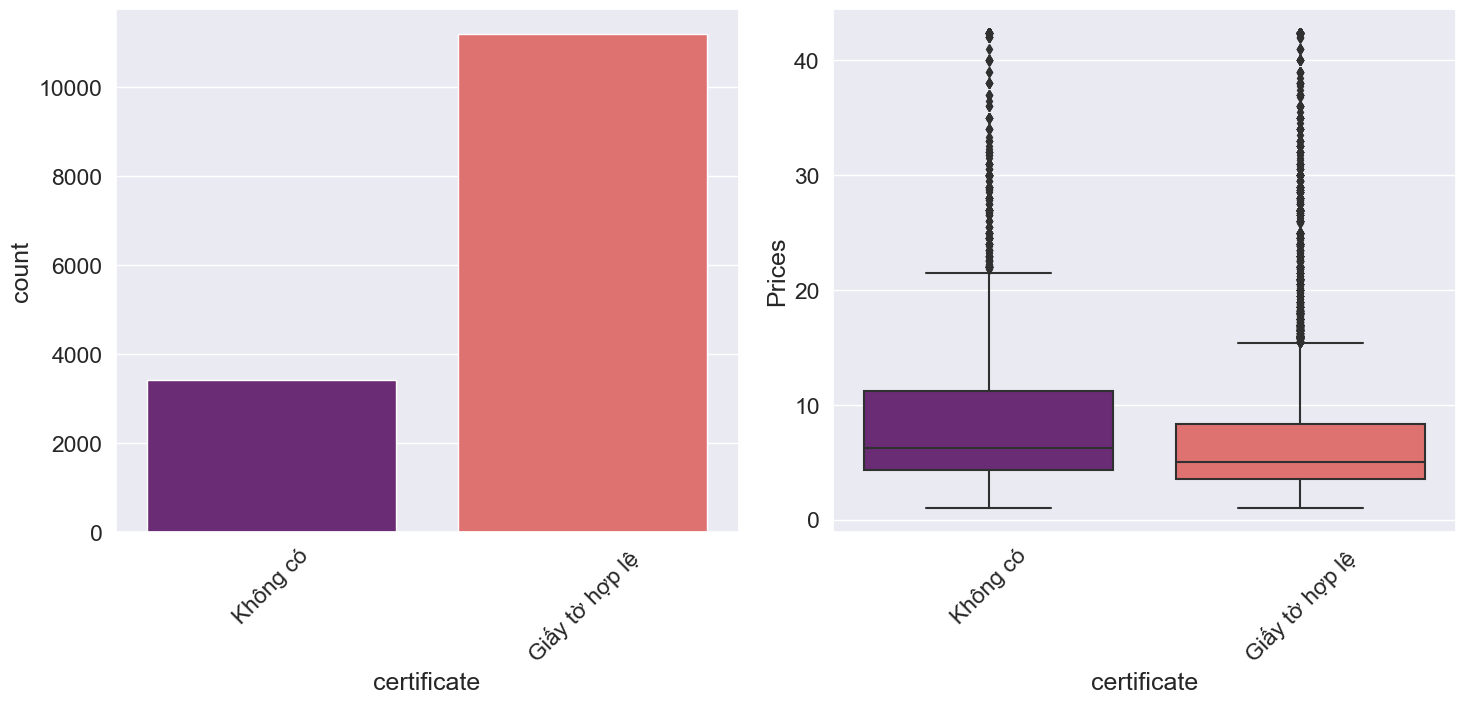

In [326]:
plt.figure(figsize=(15,20))
plot_count('certificate', 1)
plt.tight_layout()

Nhận xét:
- Nhà có giấy tờ đầy đủ thì có giá bán cao hơn nhà không có giấy tờ

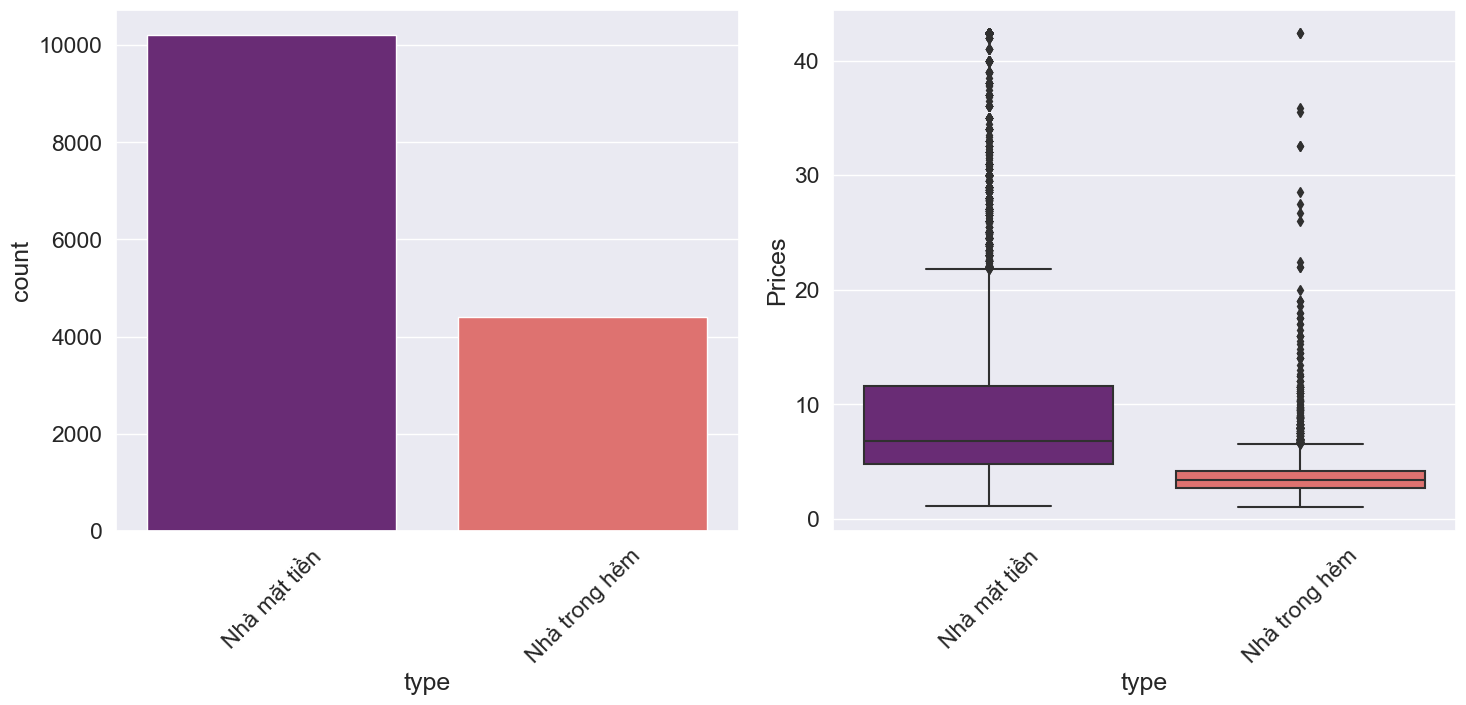

In [327]:
plt.figure(figsize=(15,20))
plot_count('type', 1)
plt.tight_layout()

Nhận xét:

- Những nhà ở mặt tiền thì có giá cao bơn những nhà ở trong hẻm

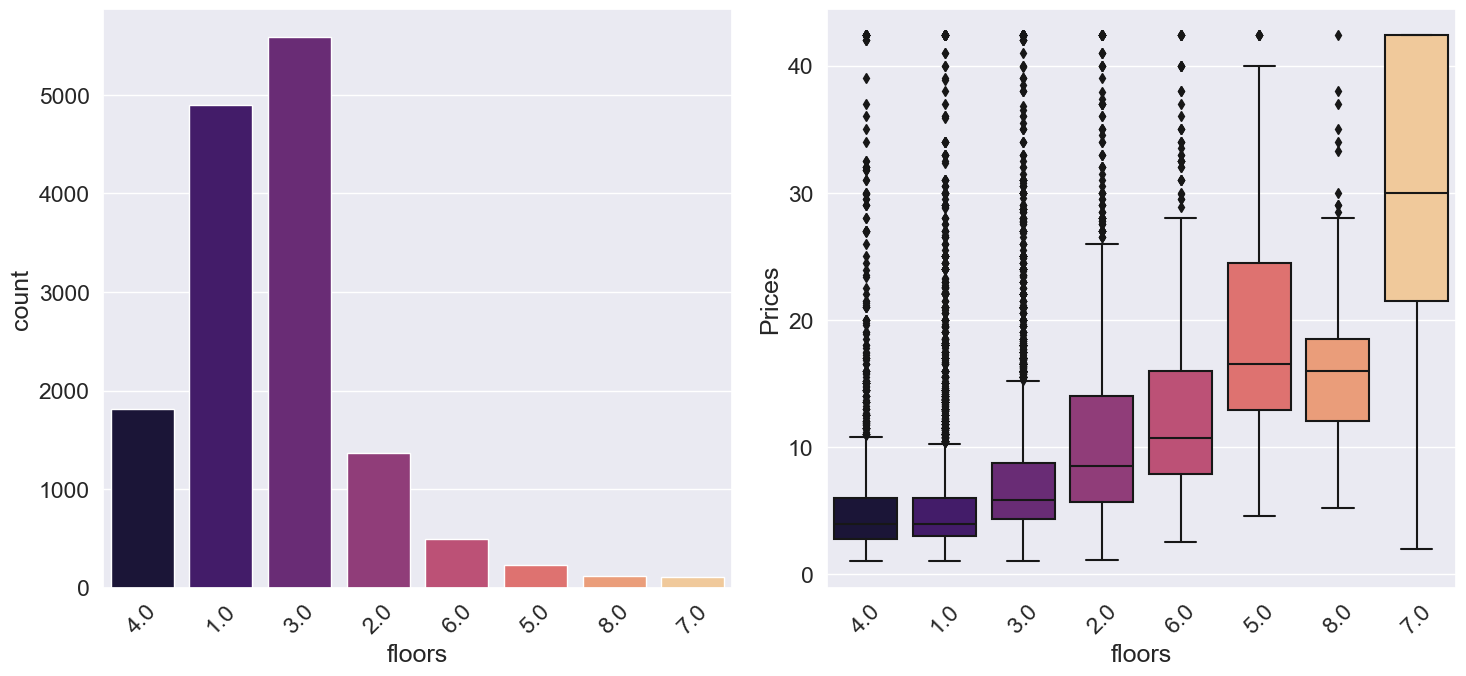

In [328]:
plt.figure(figsize=(15,20))
plot_count('floors', 1)
plt.tight_layout()

Nhận xét:
- Nhà 1 và 2 tầng được bán nhiều nhất
- Nhà cành nhiều tầng thì giá càng cao

floors tương quan với Prices

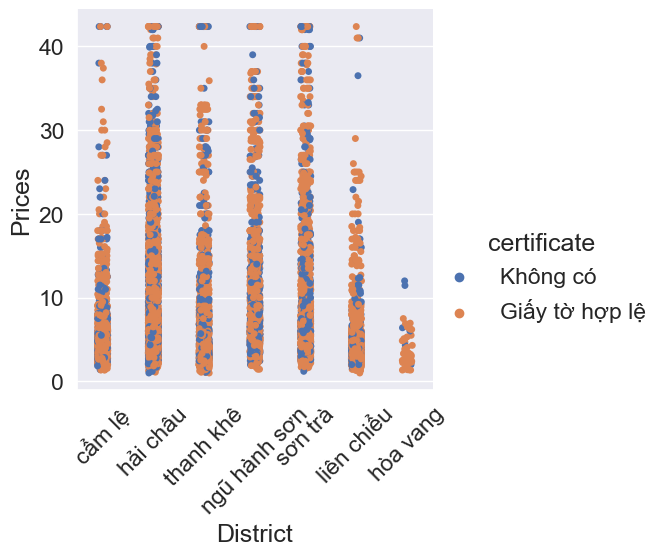

In [329]:
axis = sns.catplot(data= df,x='District',y='Prices',hue='certificate')
axis.set_xticklabels(df['District'].unique(), rotation = 45)

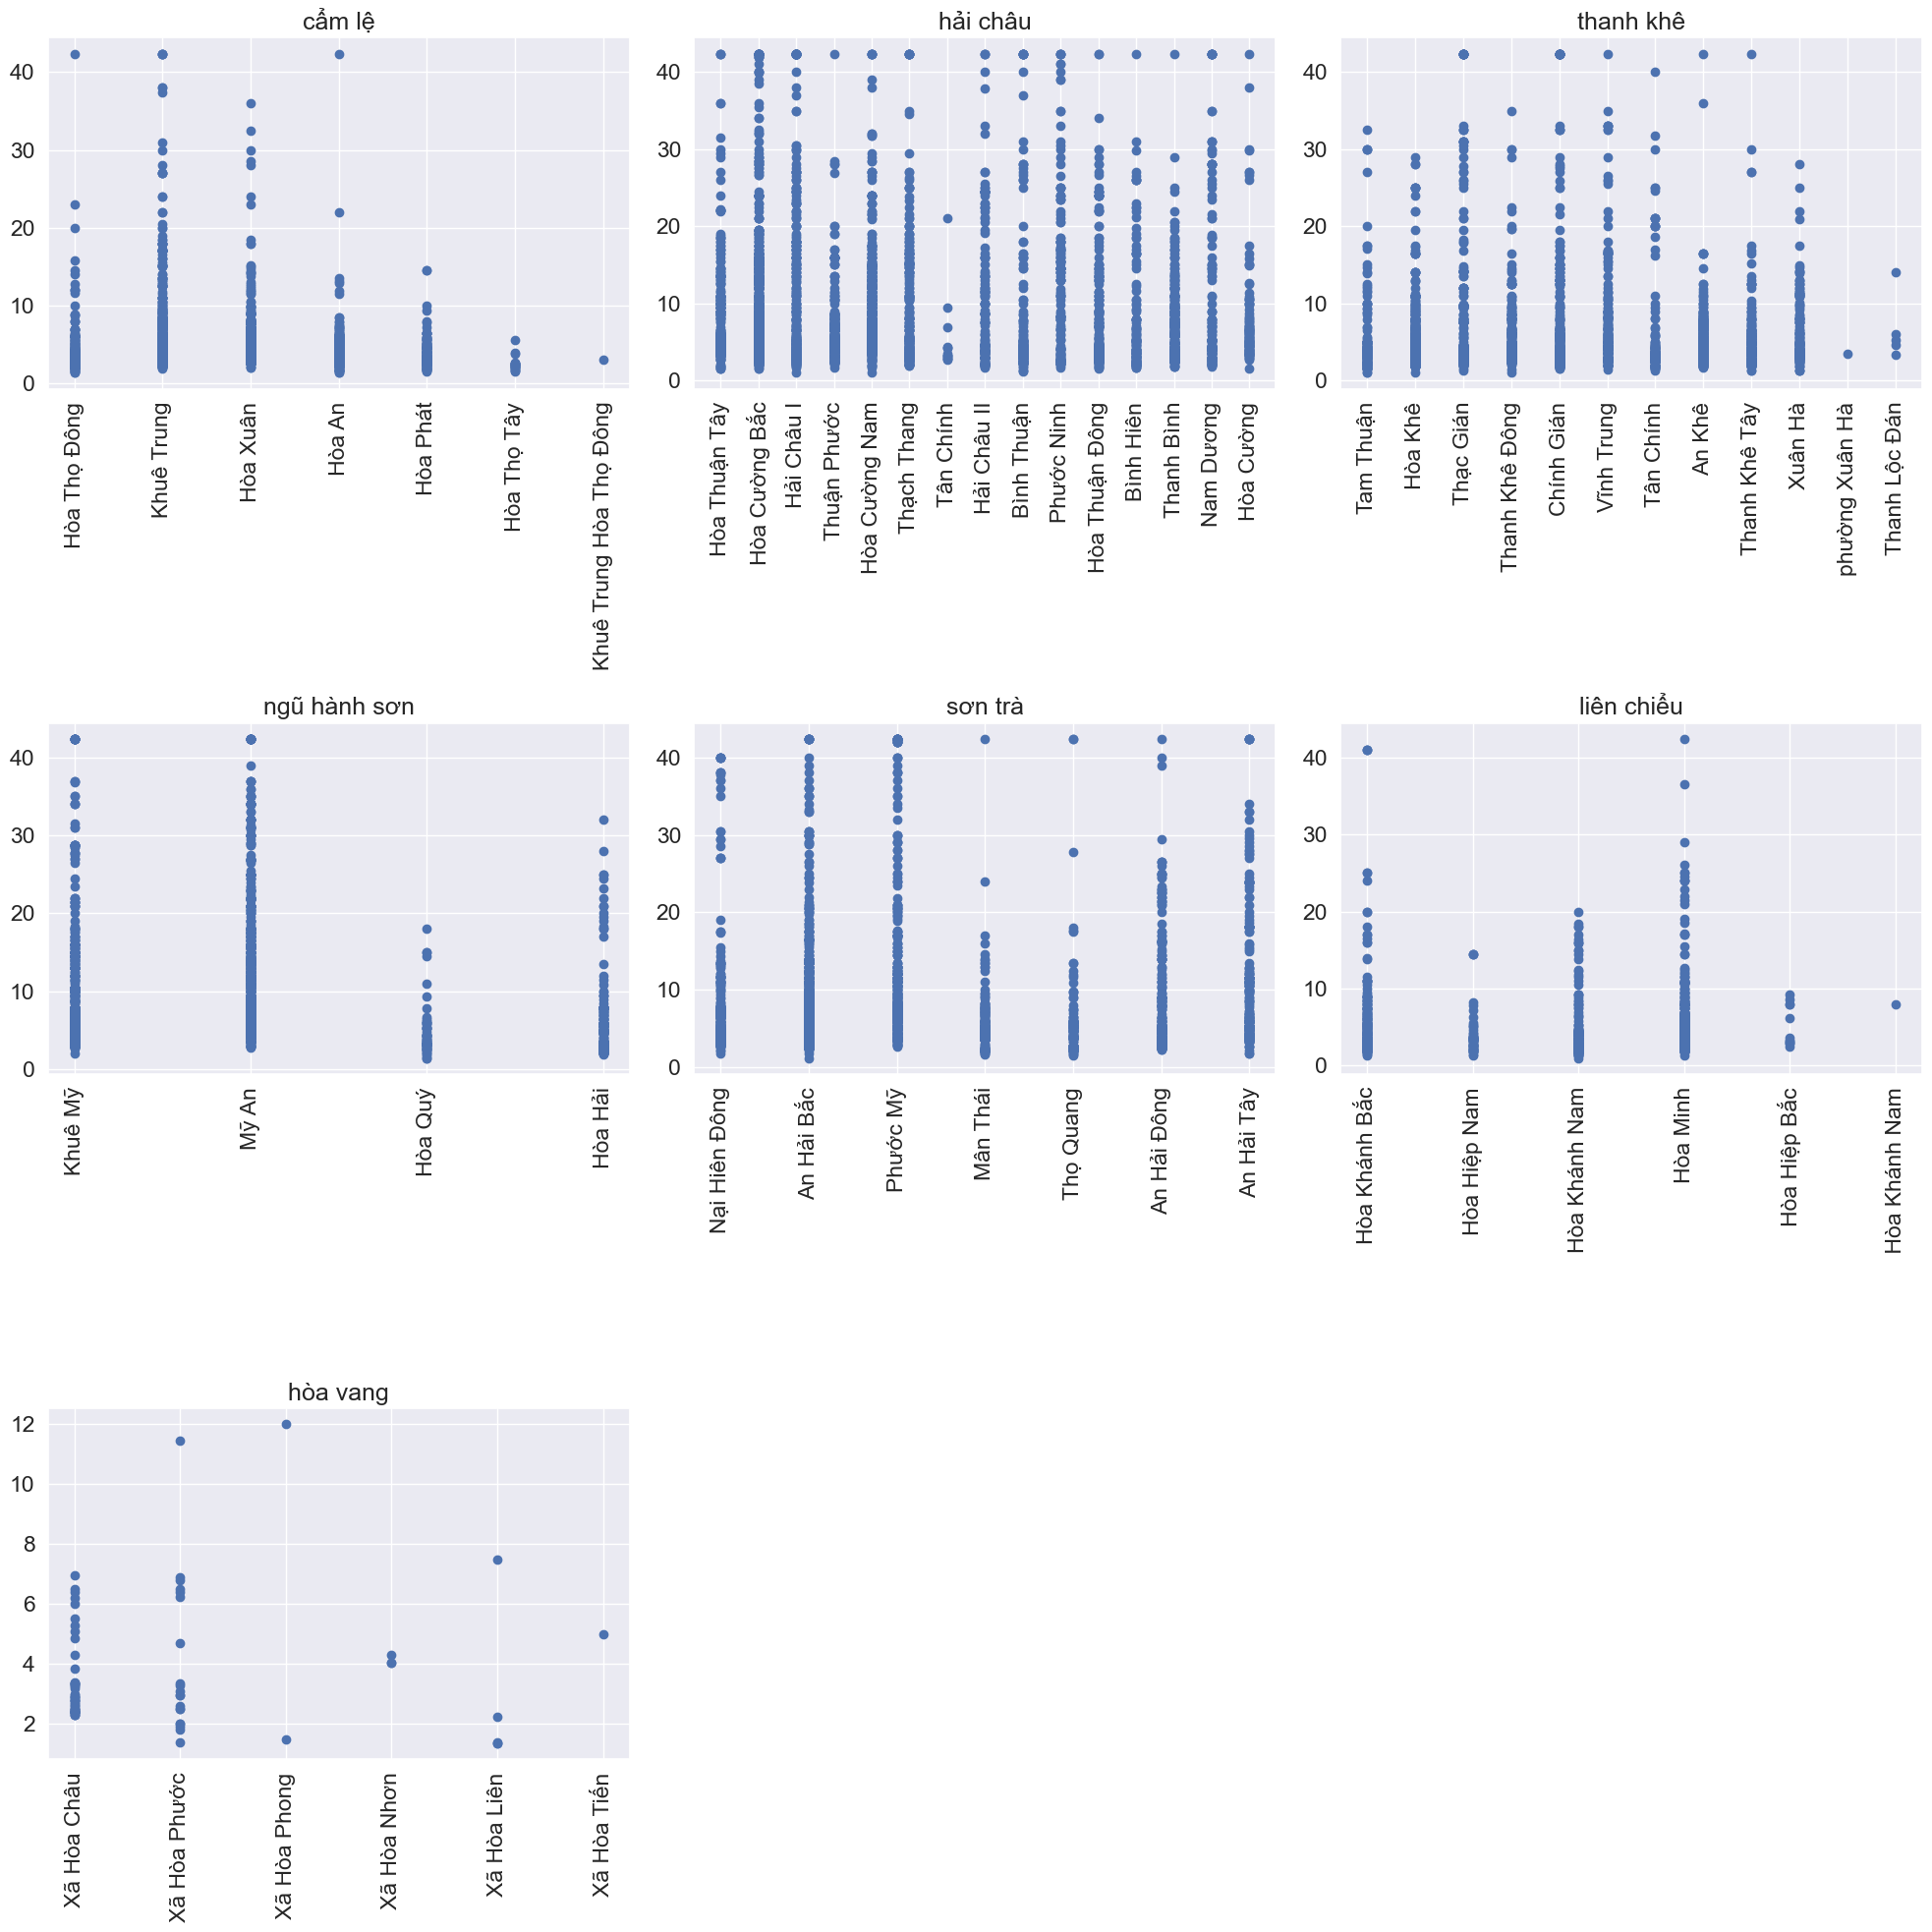

In [330]:

count =1
plt.figure(figsize=(20,20))
for i in df['District'].unique():
    PricesByWard = df[df.District == i]

    sns.set(font_scale = 1.5)
    plt.subplot(3,3,count)
    plt.scatter(PricesByWard['Ward'],PricesByWard['Prices'])
    plt.title(i)

    plt.xticks(rotation=90)
    count+=1


plt.tight_layout()


Nhận xét:
- Nhà ở các phường khác nhau thì có giá khác nhau

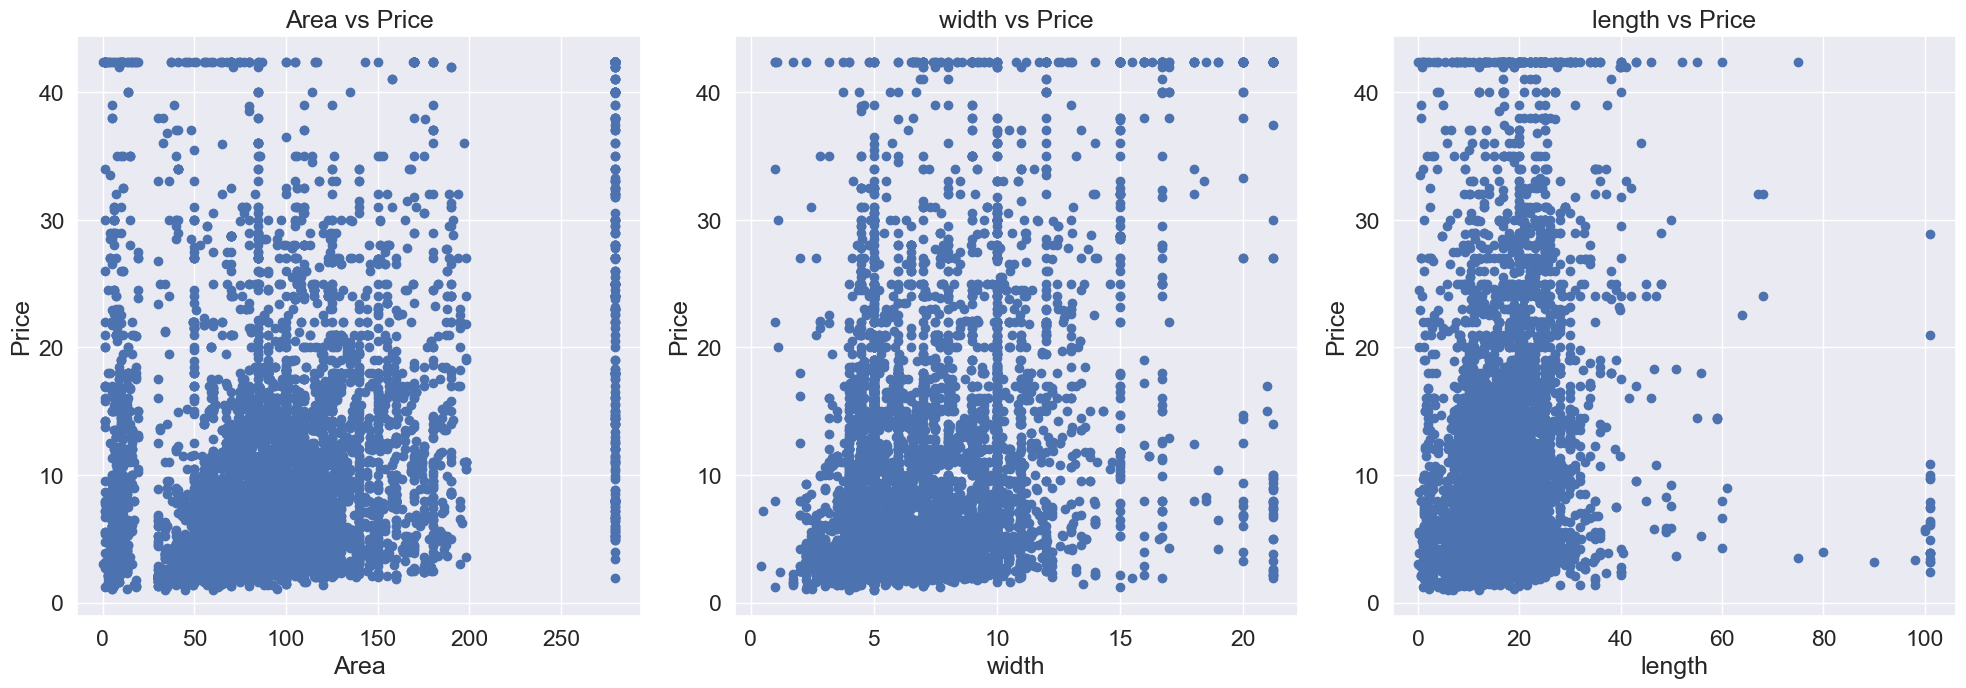

In [331]:
def scatter(x,fig):
    sns.set(font_scale = 1.5)
    plt.subplot(3,3,fig)
    plt.scatter(df[x],df['Prices'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(20,20))

scatter('Area', 1)
scatter('width', 2)
scatter('length', 3)

plt.tight_layout()

<Axes: >

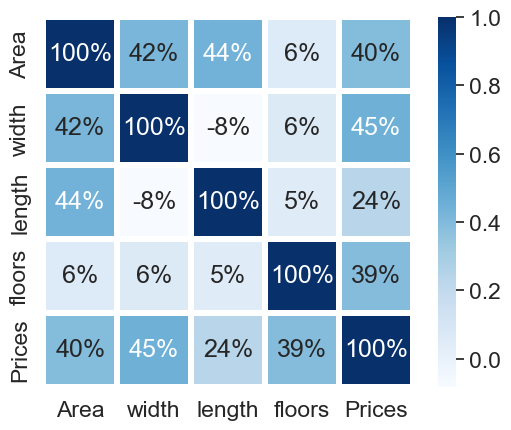

In [332]:
cols_pv = ['Area','width','length','floors','Prices']

sns.heatmap(df[cols_pv].corr(),annot=True, linewidths=3, square=True, cmap='Blues', fmt=".0%")


<h2>Kết Luận</h2>

Các biến ảnh hưởng đến Prices:

- Are
- length
- width
- District
- certificate
- floors


## Lable Encoding

In [333]:
df['District'].unique()

array(['cẩm lệ', 'hải châu', 'thanh khê', 'ngũ hành sơn', 'sơn trà',
       'liên chiểu', 'hòa vang'], dtype=object)

Chuyển dữ liệu trường District về dạnh số

- cẩm lệ -> 0
- hải châu -> 1
- thanh khê -> 2
- ngũ hành sơn -> 3
- sơn trà -> 4
- liên chiểu -> 5
- hòa vang -> 6

In [334]:
from sklearn.preprocessing import LabelEncoder

# Khởi tạo LabelEncoder
le = LabelEncoder()

df['District'] = le.fit_transform(df['District'])


In [335]:
type_map = {'Nhà trong hẻm':0,'Nhà mặt tiền':1}
df['type']=le.fit_transform(df['type'].map(type_map))

In [336]:
df['certificate']= le.fit_transform(df['certificate'])

In [337]:
df.head(5)

,Unnamed: 0,Street,Ward,District,Prices,Area,toFace,type,certificate,width,length,floors,Location,Latitude,Longitude,DistanceToCenter,DistanceToBeach
0,0,Hà Mục,Hòa Thọ Đông,0,5.15,100.0,Tây Nam,1,1,5.000000,20.000000,4.0,"16.01918,108.19537",16.01918,108.195374,5.750916,7.862720
1,1,Thi Sách,Hòa Thuận Tây,2,4.10,85.0,Không,1,1,9.219544,9.219544,1.0,"16.0546,108.20547",16.05460,108.205467,2.389182,4.683770
2,2,Ông Ích Khiêm,Tam Thuận,6,11.00,67.0,Tây,1,0,3.800000,17.631579,3.0,"16.06653,108.2142",16.06653,108.214203,1.465144,3.435286
3,3,Núi Thành,Hòa Cường Bắc,2,17.50,137.0,Tây,1,0,7.300000,18.767123,3.0,"16.03194,108.22279",16.03194,108.222794,3.281117,4.948860
4,4,Trương Văn Hiến,Khuê Mỹ,4,7.00,90.0,Đông Nam,1,0,5.000000,18.000000,4.0,"16.01947,108.25592",16.01947,108.255920,5.590678,5.759550


# Chia Train/Test

In [338]:
from sklearn.model_selection import train_test_split
house = df[['Prices','District','Area','type','certificate','width','length','floors','DistanceToCenter','DistanceToBeach']]
df_train, df_test = train_test_split(house, test_size = 0.2, random_state=123)

print(df_train.shape)
print(df_test.shape)

(11688, 10)
(2923, 10)


## Outlier

In [339]:
data = df_train.copy()

In [340]:
uppper_boundary=df_train['Prices'].mean() + 3* df_train['Prices'].std()
lower_boundary=df_train['Prices'].mean() - 3* df_train['Prices'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 30.160299571000742


In [341]:
df_train.loc[(df_train.Prices>uppper_boundary),'Prices'] = uppper_boundary

<Axes: xlabel='Prices', ylabel='Count'>

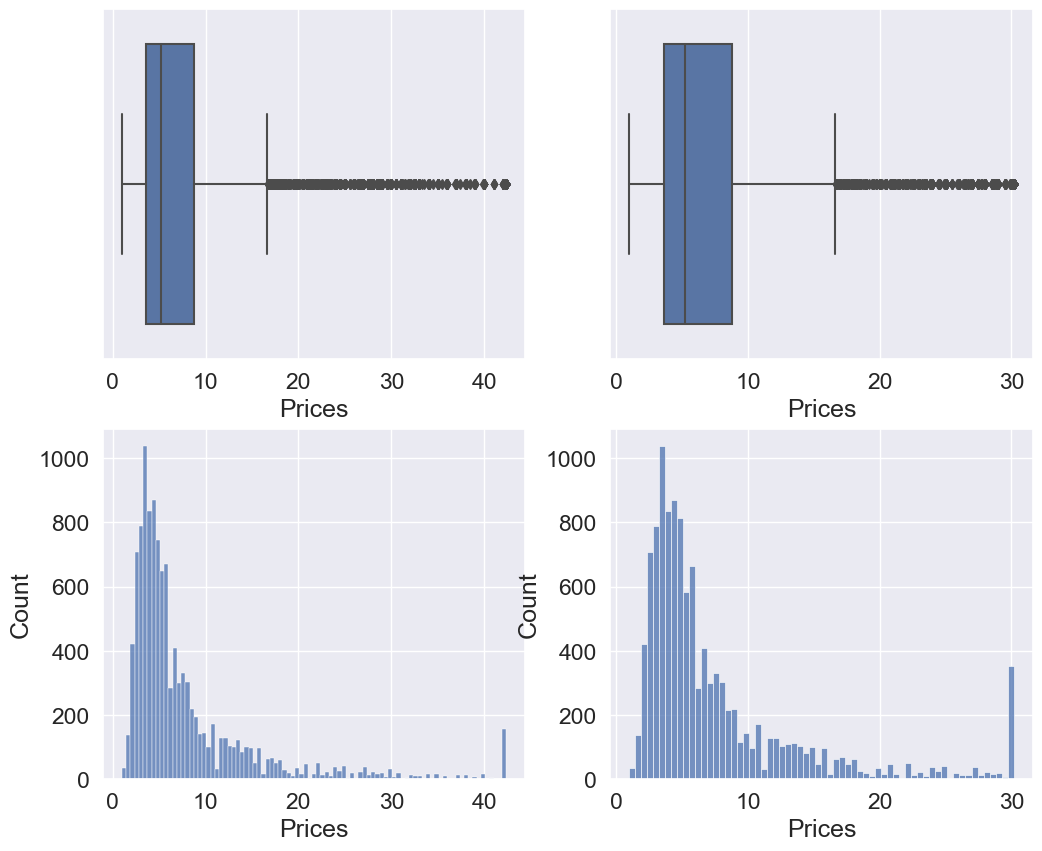

In [342]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(12,10))
sns.boxplot(data=data,x='Prices',ax=axes[0][0])
sns.boxplot(data=df_train,x='Prices',ax=axes[0][1])
sns.histplot(data=data,x='Prices',ax=axes[1][0])
sns.histplot(data=df_train,x='Prices',ax=axes[1][1])

In [343]:
uppper_boundary=df_train['Area'].mean() + 3* df_train['Area'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 224.54458087902515


In [344]:
df_train.loc[(df_train.Area>uppper_boundary),'Area'] = uppper_boundary

<Axes: xlabel='Area', ylabel='Count'>

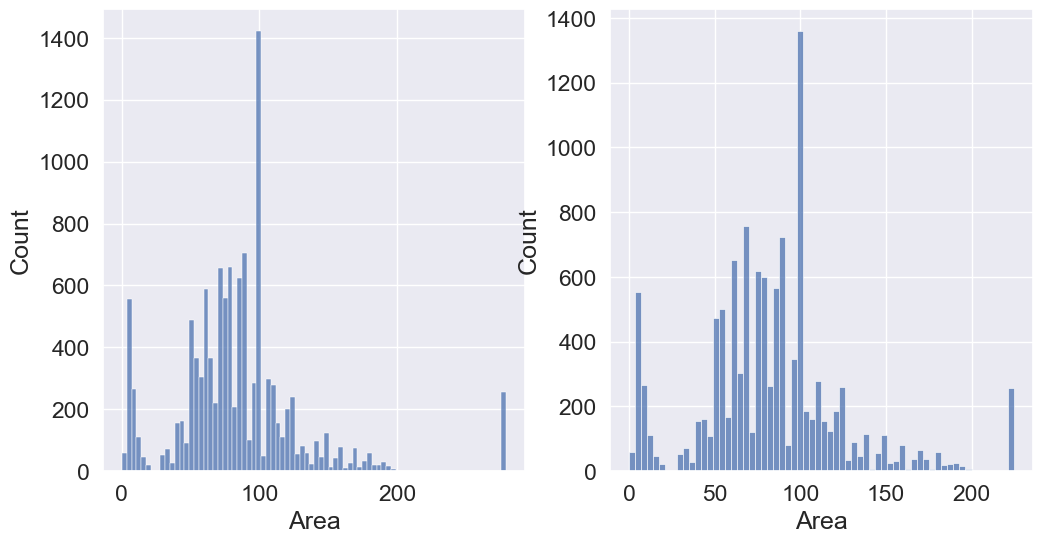

In [345]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.histplot(data=data,x='Area',ax=axes[0])
sns.histplot(data=df_train,x='Area',ax=axes[1])

In [346]:
uppper_boundary=df_train['floors'].mean() + 3* df_train['floors'].std()
print("Biên trên:",uppper_boundary)

Biên trên: 6.273421020085035


In [347]:
df_train.loc[(df_train.floors>uppper_boundary),'floors']=int(uppper_boundary)

<Axes: xlabel='floors'>

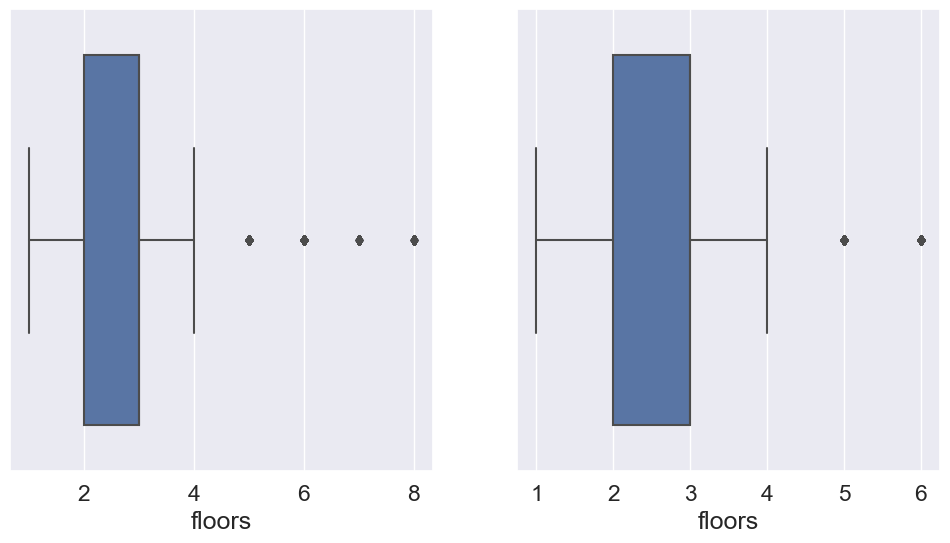

In [348]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='floors',ax=axes[0])
sns.boxplot(data=df_train,x='floors',ax=axes[1])

In [349]:
uppper_boundary=df_train['width'].mean() + 3* df_train['width'].std()
print("Biên trên:",uppper_boundary)
df_train.loc[(df_train.width>uppper_boundary),'width'] = uppper_boundary

Biên trên: 13.848831552393431


<Axes: xlabel='width'>

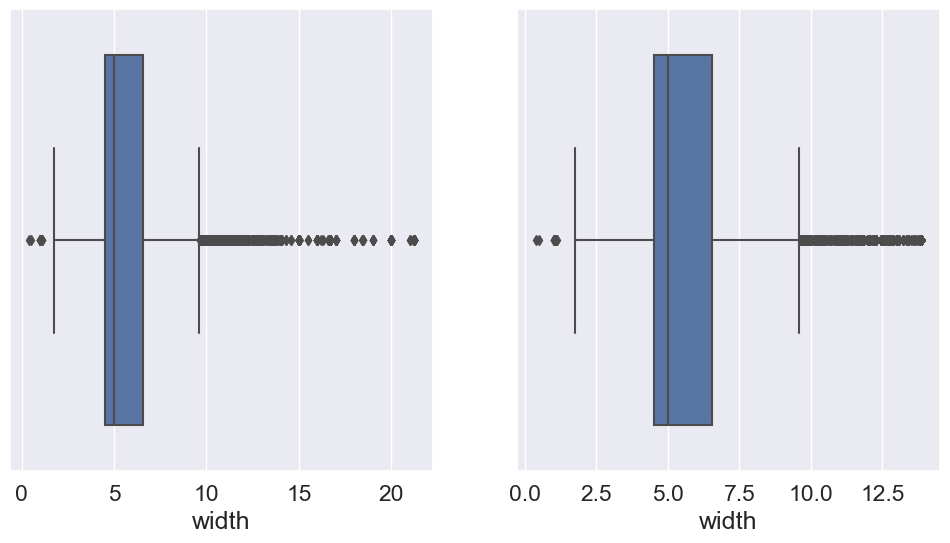

In [350]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='width',ax=axes[0])
sns.boxplot(data=df_train,x='width',ax=axes[1])

In [351]:
uppper_boundary=df_train['length'].mean() + 3* df_train['length'].std()
print("Biên trên:",uppper_boundary)
df_train.loc[(df_train.length>uppper_boundary),'length'] = uppper_boundary

Biên trên: 37.97203381880015


<Axes: xlabel='length'>

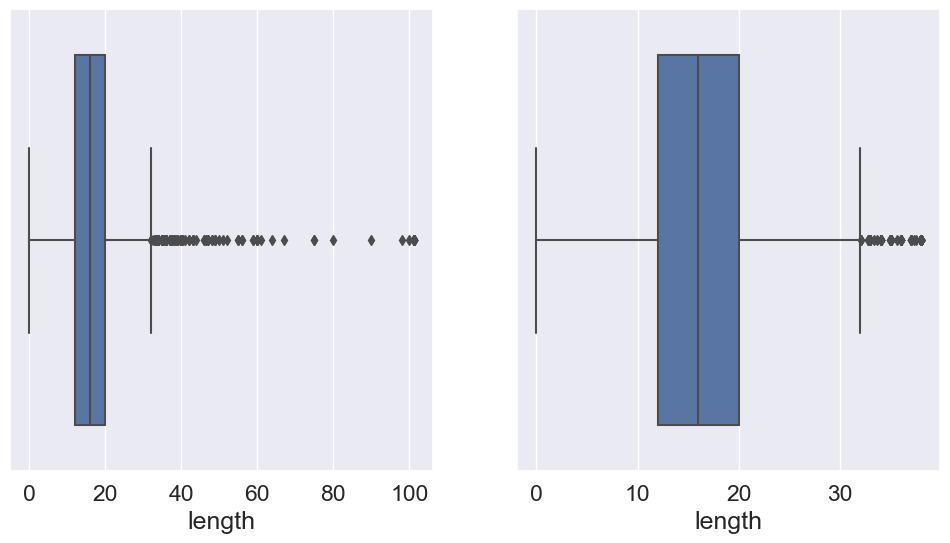

In [352]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(data=data,x='length',ax=axes[0])
sns.boxplot(data=df_train,x='length',ax=axes[1])

### Tách đặc trưng

In [353]:
X_train = df_train.copy()
X_test = df_test.copy()

print("X_train: {0}".format(X_train.shape))
print("X_test: {0}".format(X_test.shape))


X_train: (11688, 10)
X_test: (2923, 10)


In [354]:
y_train = X_train.pop('Prices')
y_test = X_test.pop('Prices')
print("Y_train: {0}".format(y_train.shape))
print("y_test: {0}".format(y_test.shape))

Y_train: (11688,)
y_test: (2923,)


In [355]:
X_train.head()

,District,Area,type,certificate,width,length,floors,DistanceToCenter,DistanceToBeach
5131,2,70.0,1,0,5.0,14.0,4.0,3.280804,5.112269
6595,5,120.0,1,0,5.0,25.0,3.0,4.377946,2.882314
7653,0,70.0,1,0,5.0,14.0,2.0,4.911973,6.807191
11352,2,81.0,1,0,4.5,18.0,3.0,3.534710,5.315790
225,4,75.0,1,0,5.0,15.0,3.0,3.164896,3.429240


In [356]:
X_test.head()

,District,Area,type,certificate,width,length,floors,DistanceToCenter,DistanceToBeach
13960,2,60.0,0,1,4.500000,13.500000,4.0,3.281117,4.948860
6892,6,56.0,0,0,4.000000,14.000000,2.0,5.940162,7.801358
162,2,96.0,1,0,5.000000,19.200000,3.0,2.362345,4.664409
11690,6,80.0,1,0,4.400000,18.000000,3.0,3.351077,5.365487
10226,2,147.0,1,1,12.124356,12.124356,2.0,2.056364,4.132130


## Feature Transformation

In [357]:
data=df_train.copy()

In [358]:
import scipy.stats as stat
def plot_data(feature):
    plt.figure(figsize=(10,6))

    plt.subplot(2,2,1)
    stat.probplot(data[feature],dist='norm',plot=plt)# prob plot

    plt.subplot(2,2,2)
    stat.probplot(df_train[feature],dist='norm',plot=plt)# prob plot

    plt.subplot(2,2,3)
    sns.histplot(data[feature])

    plt.subplot(2,2,4)
    sns.histplot(df_train[feature])
    
    plt.show()

Chuẩn hóa các trường Area, width, length với chuẩn hóa Normalizer

In [359]:
from sklearn.preprocessing import MaxAbsScaler,Normalizer,StandardScaler,RobustScaler,PowerTransformer
scaler = StandardScaler()
X_train =  pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test =  pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
# df_test.loc[:,['Area','width','length']] = (scaler.transform(df_test[['Area','width','length']]))

Chuẩn hóa trường Prices với phương pháp chuẩn hóa PowerTransformer

In [360]:
# scaler = PowerTransformer()
# df_train['Prices'] = scaler.fit_transform(df_train[['Prices']])
# df_train.loc[:,['Prices']] = (scaler.fit_transform(df_train[['Prices']]))
# df_test.loc[:,['Prices']] = (scaler.transform(df_test[['Prices']]))

<Axes: xlabel='Area', ylabel='Prices'>

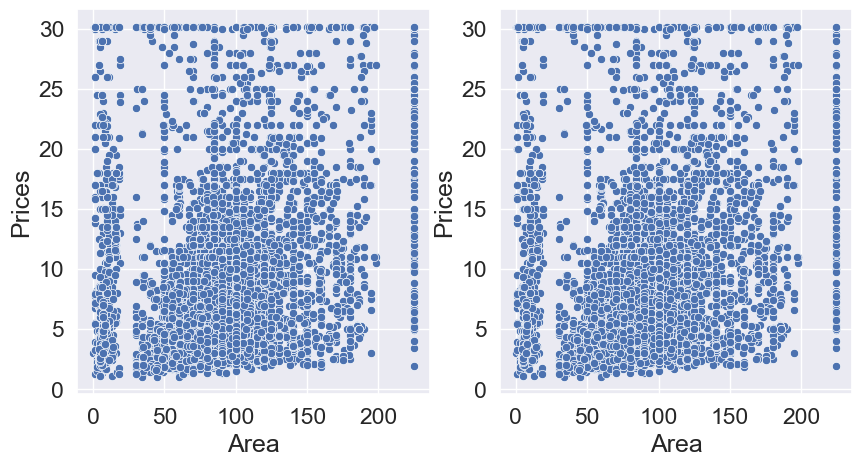

In [361]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.scatterplot(data=df_train,x='Area',y='Prices',ax=axes[0])
sns.scatterplot(data=data,x='Area',y='Prices',ax=axes[1])

<Axes: xlabel='width', ylabel='Prices'>

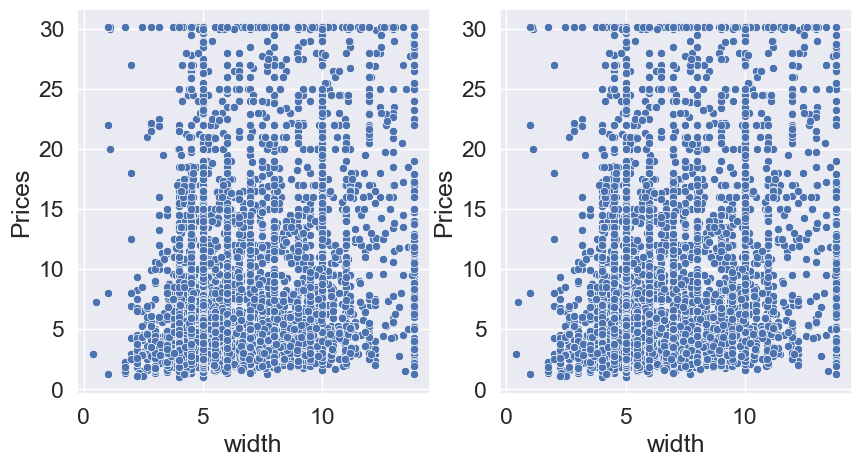

In [362]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.scatterplot(data=df_train,x='width',y='Prices',ax=axes[0])
sns.scatterplot(data=data,x='width',y='Prices',ax=axes[1])

<Axes: xlabel='length', ylabel='Prices'>

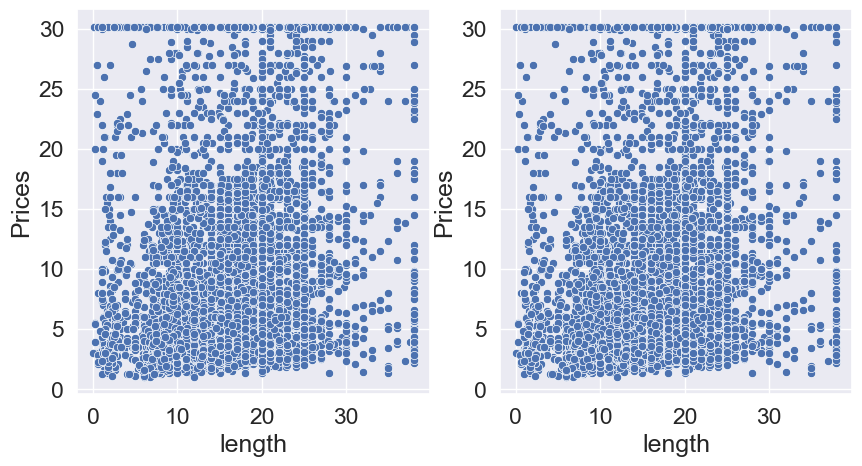

In [363]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.scatterplot(data=df_train,x='length',y='Prices',ax=axes[0])
sns.scatterplot(data=data,x='length',y='Prices',ax=axes[1])

In [364]:
df_train.head()

,Prices,District,Area,type,certificate,width,length,floors,DistanceToCenter,DistanceToBeach
5131,5.80,2,70.0,1,0,5.0,14.0,4.0,3.280804,5.112269
6595,9.00,5,120.0,1,0,5.0,25.0,3.0,4.377946,2.882314
7653,2.95,0,70.0,1,0,5.0,14.0,2.0,4.911973,6.807191
11352,11.00,2,81.0,1,0,4.5,18.0,3.0,3.534710,5.315790
225,9.30,4,75.0,1,0,5.0,15.0,3.0,3.164896,3.429240


In [365]:
df_test.head()

,Prices,District,Area,type,certificate,width,length,floors,DistanceToCenter,DistanceToBeach
13960,4.70,2,60.0,0,1,4.500000,13.500000,4.0,3.281117,4.948860
6892,1.86,6,56.0,0,0,4.000000,14.000000,2.0,5.940162,7.801358
162,8.90,2,96.0,1,0,5.000000,19.200000,3.0,2.362345,4.664409
11690,14.50,6,80.0,1,0,4.400000,18.000000,3.0,3.351077,5.365487
10226,11.00,2,147.0,1,1,12.124356,12.124356,2.0,2.056364,4.132130


# Linear Regression (Trinh)

In [366]:
from sklearn.linear_model import LinearRegression
# Dùng LinerRegression
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

In [367]:
y_pred_LR  = model_LR.predict(X_test)

In [368]:
from sklearn.metrics import make_scorer, r2_score,mean_absolute_error,mean_squared_error
r2_score_LR = r2_score(y_test,y_pred_LR)
rmse_score_LR = np.sqrt(mean_squared_error(y_test,y_pred_LR))
mae_score_LR = mean_absolute_error(y_test,y_pred_LR)
print("r2_score: ",r2_score_LR)
print("rmse_score: ",rmse_score_LR)
print("mae_score: ",mae_score_LR)

r2_score:  -1.6942342582697014
rmse_score:  12.085943107905225
mae_score:  3.59235387517487


In [369]:
rs = {
  "Price_Test": y_test[:10],
  "Price_Predict": y_pred_LR[:10]
}

df_predict = pd.DataFrame(rs)
print(df_predict)

       Price_Test  Price_Predict
13960        4.70       5.734896
6892         1.86       1.716470
162          8.90       8.522525
11690       14.50       8.286447
10226       11.00      13.402997
2613         7.90      11.935670
305          2.50       3.508188
10472        8.00      11.835597
11005       17.00      15.936102
5435         1.68       0.449051


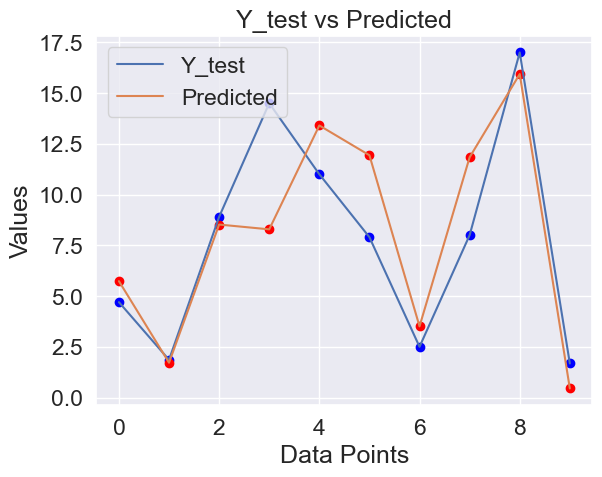

In [370]:
y_actual = y_test[:10]
y_predicted = y_pred_LR[:10]
index = range(10)

plt.plot(index,y_actual, label='Y_test')
plt.scatter(index, y_actual, color='blue')
plt.plot(index,y_predicted, label='Predicted')
plt.scatter(range(len(y_predicted)), y_predicted, color='red')

plt.xlabel('Data Points')
plt.ylabel('Values')

plt.title('Y_test vs Predicted')
plt.legend()

plt.show()

In [371]:
from sklearn.model_selection import cross_val_score
model =LinearRegression()
scorer = make_scorer(r2_score)

r2_scores_LR = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
rmse_scores_LR = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores_LR = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

In [372]:
for i, score in enumerate(r2_scores_LR):
    print(f"Fold {i+1}: {score}")
print("R2 Score:", np.mean(r2_scores_LR))

Fold 1: 0.4671487341923679
Fold 2: 0.5089921595106153
Fold 3: 0.46097768198723144
Fold 4: 0.46977327315587036
Fold 5: 0.4488584022317633
R2 Score: 0.47115005021556966


In [373]:
for i, score in enumerate(rmse_scores_LR):
    print(f"Fold {i+1}: {np.sqrt(score)}")
print("RMSE Score:", np.mean(np.sqrt(rmse_scores_LR)))

Fold 1: 4.571979470090903
Fold 2: 4.523423614811184
Fold 3: 4.747523368292052
Fold 4: 4.841782804382811
Fold 5: 4.918101789928178
RMSE Score: 4.720562209501026


In [374]:
for i, score in enumerate(mae_scores_LR):
    print(f"Fold {i+1}: {score}")
print("MAE Score:", np.mean(mae_scores_LR))

Fold 1: 3.12178908262538
Fold 2: 3.1236829749926627
Fold 3: 3.230988566548389
Fold 4: 3.2739087343610462
Fold 5: 3.319034353484218
MAE Score: 3.2138807424023397


### Tìm siêu tham số cho mô hình linear regression
Các siêu tham số quan trọng nhất trong mô hình Linear Regression bao gồm:

- Intercept (fit_intercept): Siêu tham số này quyết định liệu mô hình có sử dụng điểm cắt với trục y hay không. Nếu fit_intercept=True, mô hình sẽ có một điểm cắt với trục y. Nếu fit_intercept=False, mô hình sẽ đi qua gốc tọa độ (0,0). Mặc định, fit_intercept=True.

- Tham số copy_X quyết định liệu có sao chép (copy) các dữ liệu đầu vào (X) hay không. Nếu copy_X=True, dữ liệu đầu vào sẽ được sao chép trước khi huấn luyện mô hình để đảm bảo rằng dữ liệu gốc không bị thay đổi. Nếu copy_X=False, dữ liệu đầu vào sẽ được sử dụng trực tiếp. Mặc định, copy_X=True.

- Tham số positive quyết định liệu các hệ số trong mô hình Linear Regression có bị giới hạn là các giá trị dương hay không. Nếu positive=True, các hệ số sẽ bị giới hạn là các giá trị dương. Tham số này thường được sử dụng trong các bài toán mà các biến độc lập phải có ảnh hưởng dương đối với biến phụ thuộc. Mặc định, positive=False.

In [375]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import numpy as np

# Khởi tạo mô hình Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Thiết lập các giá trị tham số để thử nghiệm
param_grid = {'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive': [True, False],
              'n_jobs':[1,2,3]}

# Sử dụng Grid Search để tìm kiếm giá trị tốt nhất cho các tham số
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# In kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best score: 0.47115005021556966


Nhận xét:
Các siêu tham số mới tìm được bằng giá trị default 

# Random Forest Regressor (QKhang)

In [376]:
from sklearn.ensemble import RandomForestRegressor
model_RD = RandomForestRegressor(random_state=123)
model_RD.fit(X_train,y_train)

RandomForestRegressor(random_state=123)

In [377]:
y_pred_RD = model_RD.predict(X_test)

In [378]:
r2_score_RD = r2_score(y_test,y_pred_RD)
rmse_score_RD = np.sqrt(mean_squared_error(y_test,y_pred_RD))
mae_score_RD = mean_absolute_error(y_test,y_pred_RD)
print("r2_score: ",r2_score_RD)
print("rmse_score: ",rmse_score_RD)
print("mae_score: ",mae_score_RD)

r2_score:  0.7439307418844361
rmse_score:  3.725989186438208
mae_score:  1.7312184269883741


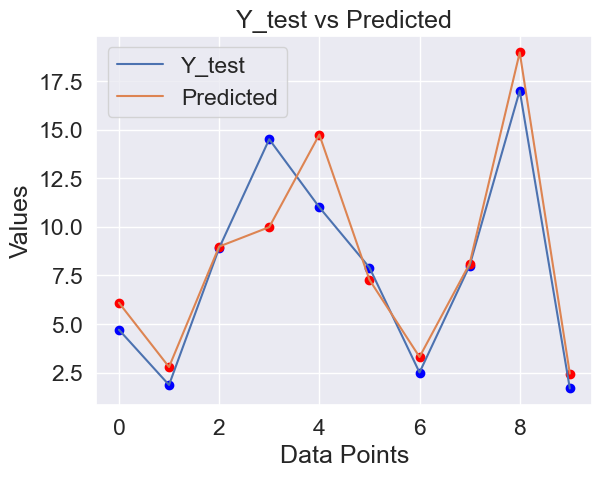

In [379]:
y_actual = y_test[:10]
y_predicted = y_pred_RD[:10]
index = range(10)

plt.plot(index,y_actual, label='Y_test')
plt.scatter(index, y_actual, color='blue')
plt.plot(index,y_predicted, label='Predicted')
plt.scatter(range(len(y_predicted)), y_predicted, color='red')

plt.xlabel('Data Points')
plt.ylabel('Values')

plt.title('Y_test vs Predicted')
plt.legend()

plt.show()


In [380]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score,mean_absolute_error,mean_squared_error
model =RandomForestRegressor(random_state=123)
scorer = make_scorer(r2_score)

r2_scores_RD = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
rmse_scores_RD = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores_RD = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

In [381]:
for i, score in enumerate(r2_scores_RD):
    print(f"Fold {i+1}: {score}")
print("R2 Score:", np.mean(r2_scores_RD))

Fold 1: 0.7638241596253335
Fold 2: 0.8046991494181306
Fold 3: 0.7638961163318083
Fold 4: 0.7878801631798855
Fold 5: 0.7657469638790605
R2 Score: 0.7772093104868437


In [382]:
for i, score in enumerate(rmse_scores_RD):
    print(f"Fold {i+1}: {np.sqrt(score)}")
print("RMSE Score:", np.mean(np.sqrt(rmse_scores_RD)))

Fold 1: 3.043820273615241
Fold 2: 2.8528248891878776
Fold 3: 3.1420659968376814
Fold 4: 3.062422721102886
Fold 5: 3.2063323132079646
RMSE Score: 3.0614932387903298


In [383]:
for i, score in enumerate(mae_scores_RD):
    print(f"Fold {i+1}: {score}")
print("MAE Score:", np.mean(mae_scores_RD))

Fold 1: 1.518813857107947
Fold 2: 1.449922032298301
Fold 3: 1.5805020640915186
Fold 4: 1.5213625579261565
Fold 5: 1.5279908568887395
MAE Score: 1.5197182736625325


### Tìm siêu tham số cho mô hình

Các siêu tham số của mô hình

- n_estimators: Số lượng cây quyết định
- max_depth: Độ sâu tối đa của các cây quyết định
- min_samples_split: Số lượng mẫu tối thiểu yêu cầu để phân chia một nút.
- min_samples_leaf: Số lượng mẫu tối thiểu yêu cầu để tạo ra một lá
- max_features: Số lượng đặc trưng tối đa được xem xét để tìm kiếm phân chia tốt nhất (sqrt, log2)


In [429]:


# param_grid = {
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth': [3, 6, 9],
#     'max_leaf_nodes': [3, 6, 9],
# }
param_grid = {
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],  # độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10],  # số lượng mẫu tối thiểu để chia nút
    'min_samples_leaf': [1, 2, 4],  # số lượng mẫu tối thiểu trong lá
}


In [430]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model_RD, param_grid=param_grid)
# Fit the grid search to the data
grid_fit = grid_search.fit(X_train, y_train)
best_parameters = grid_fit.best_params_
best_parameters


{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [441]:
model_RD1 = RandomForestRegressor(random_state=123,max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=2)
model_RD1.fit(X_train, y_train)
y_pred_RD_stt = model_RD1.predict(X_test)

In [442]:
r2_score_RD = r2_score(y_test,y_pred_RD_stt)
rmse_score_RD = np.sqrt(mean_squared_error(y_test,y_pred_RD_stt))
mae_score_RD = mean_absolute_error(y_test,y_pred_RD_stt)
print("r2_score: ",r2_score_RD)
print("rmse_score: ",rmse_score_RD)
print("mae_score: ",mae_score_RD)

r2_score:  0.7524175985349739
rmse_score:  3.6637240392898414
mae_score:  1.7322197875633754


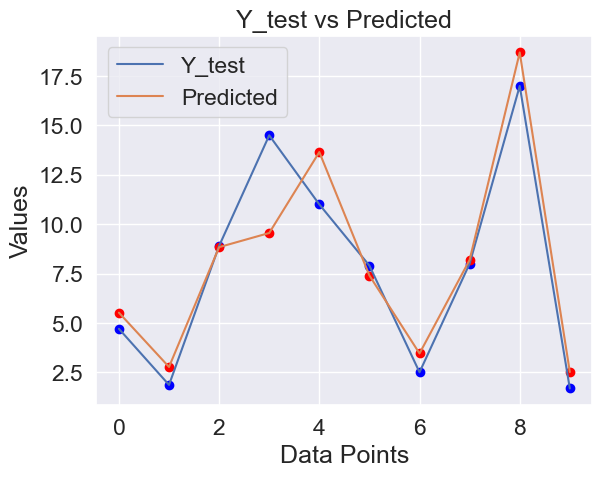

In [388]:
y_actual = y_test[:10]
y_predicted = y_pred_RD_stt[:10]
index = range(10)

plt.plot(index,y_actual, label='Y_test')
plt.scatter(index, y_actual, color='blue')
plt.plot(index,y_predicted, label='Predicted')
plt.scatter(range(len(y_predicted)), y_predicted, color='red')

plt.xlabel('Data Points')
plt.ylabel('Values')

plt.title('Y_test vs Predicted')
plt.legend()

plt.show()


In [389]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score,mean_absolute_error,mean_squared_error
model =RandomForestRegressor(random_state=123,max_depth=50,max_features='log2',min_samples_leaf=1,min_samples_split=2)
scorer = make_scorer(r2_score)

r2_scores_RD = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
rmse_scores_RD = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores_RD = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

In [390]:
for i, score in enumerate(r2_scores_RD):
    print(f"Fold {i+1}: {score}")
print("R2 Score:", np.mean(r2_scores_RD))

Fold 1: 0.778354784727004
Fold 2: 0.8134036804939708
Fold 3: 0.7713361486114519
Fold 4: 0.7959239350671992
Fold 5: 0.7752090117739632
R2 Score: 0.7868455121347179


In [391]:
for i, score in enumerate(rmse_scores_RD):
    print(f"Fold {i+1}: {np.sqrt(score)}")
print("RMSE Score:", np.mean(np.sqrt(rmse_scores_RD)))

Fold 1: 2.9486990571670506
Fold 2: 2.788525267476672
Fold 3: 3.092163820482889
Fold 4: 3.003796672319445
Fold 5: 3.1409090862691413
RMSE Score: 2.9948187807430395


In [392]:
for i, score in enumerate(mae_scores_RD):
    print(f"Fold {i+1}: {score}")
print("MAE Score:", np.mean(mae_scores_RD))

Fold 1: 1.5086843158085945
Fold 2: 1.4536279234860283
Fold 3: 1.59401764353147
Fold 4: 1.525493497041432
Fold 5: 1.534898538417912
MAE Score: 1.5233443836570875


# Decision Tree Regression (Đức)

In [395]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# X_train, y_train: Tập dữ liệu huấn luyện
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred_DT = model.predict(X_test)


In [396]:
r2_score_DT = r2_score(y_test,y_pred_DT)
rmse_score_DT = np.sqrt(mean_squared_error(y_test,y_pred_DT))
mae_score_DT = mean_absolute_error(y_test,y_pred_DT)
print("r2_score: ",r2_score_RD)
print("rmse_score: ",rmse_score_RD)
print("mae_score: ",mae_score_RD)

r2_score:  0.7524175985349739
rmse_score:  3.6637240392898414
mae_score:  1.7322197875633754


In [397]:
rs = {
  "Price_Test": y_test[:10],
  "Price_Predict": y_pred_DT[:10]
}

data = pd.DataFrame(rs)
print(data)

       Price_Test  Price_Predict
13960        4.70           7.30
6892         1.86           2.25
162          8.90           8.90
11690       14.50          10.50
10226       11.00          12.50
2613         7.90           7.29
305          2.50           2.99
10472        8.00           7.80
11005       17.00          18.50
5435         1.68           2.20


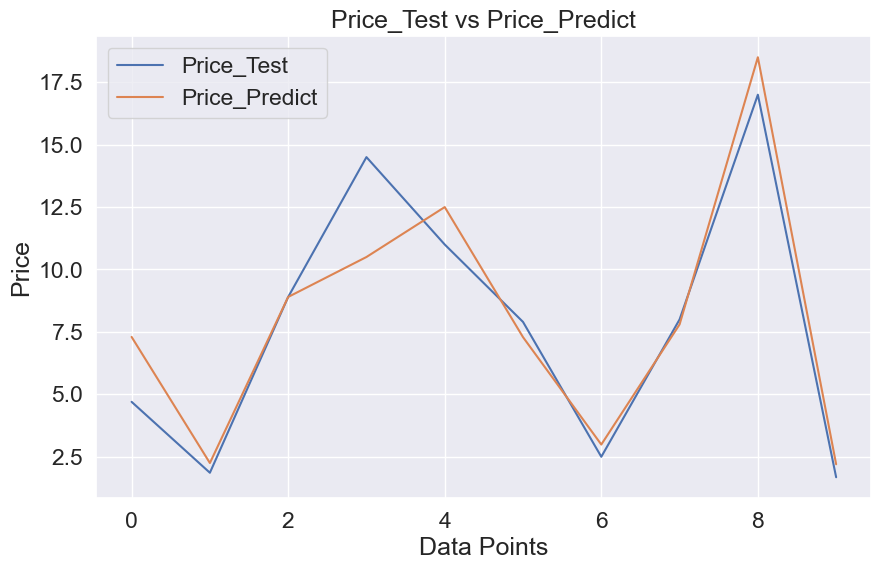

In [398]:
import matplotlib.pyplot as plt

# Trích xuất cột dữ liệu "Price_Test" và "Price_Predict"
price_test = data["Price_Test"]
price_predict = data["Price_Predict"]

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(range(len(price_test)), price_test, label="Price_Test")
plt.plot(range(len(price_predict)), price_predict, label="Price_Predict")
plt.xlabel("Data Points")
plt.ylabel("Price")
plt.title("Price_Test vs Price_Predict")
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [399]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score,mean_absolute_error,mean_squared_error
model =DecisionTreeRegressor()
scorer = make_scorer(r2_score)

r2_scores_DT = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
rmse_scores_DT = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores_DT = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

In [400]:
for i, score in enumerate(r2_scores_DT):
    print(f"Fold {i+1}: {score}")
print("R2 Score:", np.mean(r2_scores_DT))

Fold 1: 0.5883968001077031
Fold 2: 0.6586041389887831
Fold 3: 0.5785518179234097
Fold 4: 0.6614388124959538
Fold 5: 0.6010406913389769
R2 Score: 0.6176064521709653


In [401]:
for i, score in enumerate(rmse_scores_DT):
    print(f"Fold {i+1}: {np.sqrt(score)}")
print("RMSE Score:", np.mean(np.sqrt(rmse_scores_DT)))

Fold 1: 3.9826438930111787
Fold 2: 3.7726575114445287
Fold 3: 4.226613736100148
Fold 4: 3.7926237640423963
Fold 5: 4.194452063616397
RMSE Score: 3.9937981936429297


In [402]:
for i, score in enumerate(mae_scores_DT):
    print(f"Fold {i+1}: {score}")
print("MAE Score:", np.mean(mae_scores_DT))

Fold 1: 1.7837244365830707
Fold 2: 1.6394686703125154
Fold 3: 1.8788951431913405
Fold 4: 1.7658708210858214
Fold 5: 1.8743440563880986
MAE Score: 1.7884606255121693


### Tìm siêu tham số tối ưu

In [403]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Khởi tạo mô hình Decision Tree Regression
model = DecisionTreeRegressor()

# Thiết lập các giá trị để tìm kiếm
param_grid = {
    'max_depth': [None, 5, 10],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Áp dụng Grid Search với các siêu tham số và cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# In kết quả tốt nhất
print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Best Score: 0.6838697709214224
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [404]:
from sklearn.tree import DecisionTreeRegressor

# Khởi tạo mô hình Decision Tree Regression với siêu tham số tốt nhất
model = DecisionTreeRegressor(max_depth=None, min_samples_split=10, min_samples_leaf=4)

# Huấn luyện mô hình với dữ liệu huấn luyện
model.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm tra
y_pred_DT_stt = model.predict(X_test)

In [405]:
r2_score_DT_stt = r2_score(y_test,y_pred_DT_stt)
rmse_score_DT_stt = np.sqrt(mean_squared_error(y_test,y_pred_DT_stt))
mae_score_DT_stt = mean_absolute_error(y_test,y_pred_DT_stt)
print("r2_score: ",r2_score_RD)
print("rmse_score: ",rmse_score_RD)
print("mae_score: ",mae_score_RD)

r2_score:  0.7524175985349739
rmse_score:  3.6637240392898414
mae_score:  1.7322197875633754


In [406]:
rs = {
  "Price_Test": y_test[:10],
  "Price_Predict1": y_pred_DT[:10],
  "Price_Predict": y_pred_DT_stt[:10]
}

data = pd.DataFrame(rs)
print(data)

       Price_Test  Price_Predict1  Price_Predict
13960        4.70            7.30       4.462500
6892         1.86            2.25       2.616000
162          8.90            8.90       9.575000
11690       14.50           10.50      11.548889
10226       11.00           12.50      12.000000
2613         7.90            7.29       7.287778
305          2.50            2.99       3.173333
10472        8.00            7.80       8.400000
11005       17.00           18.50      15.825000
5435         1.68            2.20       2.616000


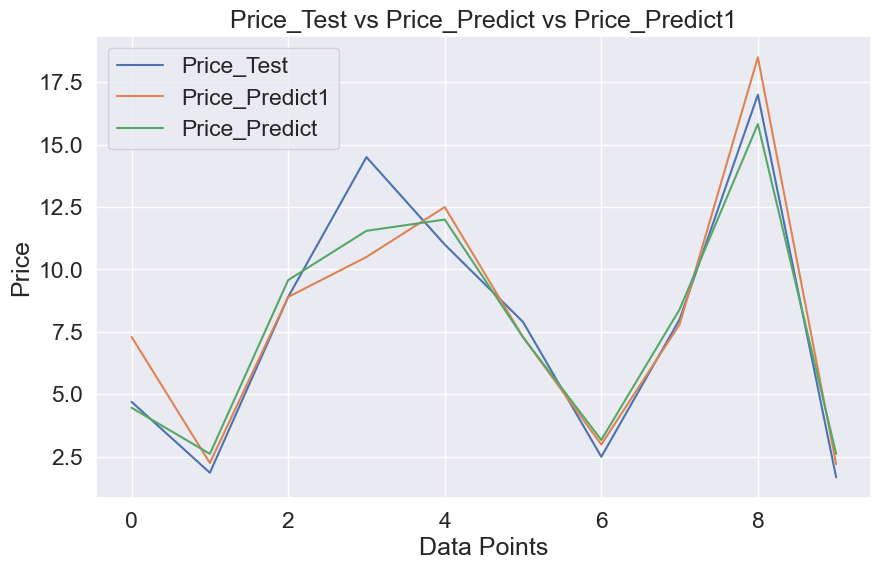

In [407]:
import matplotlib.pyplot as plt

# Trích xuất cột dữ liệu "Price_Test", "Price_Predict1" và "Price_Predict"
price_test = data["Price_Test"]
price_predict1 = data["Price_Predict1"]
price_predict = data["Price_Predict"]

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(range(len(price_test)), price_test, label="Price_Test")
plt.plot(range(len(price_predict1)), price_predict1, label="Price_Predict1")
plt.plot(range(len(price_predict)), price_predict, label="Price_Predict")
plt.xlabel("Data Points")
plt.ylabel("Price")
plt.title("Price_Test vs Price_Predict vs Price_Predict1")
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [408]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score,mean_absolute_error,mean_squared_error
model =DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=4)
scorer = make_scorer(r2_score)

r2_scores_DT_stt = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
rmse_scores_DT_stt = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_squared_error))
mae_scores_DT_stt = cross_val_score(model, X_train, y_train, cv=5, scoring=make_scorer(mean_absolute_error))

In [409]:
for i, score in enumerate(r2_scores_DT_stt):
    print(f"Fold {i+1}: {score}")
print("R2 Score:", np.mean(r2_scores_DT_stt))

Fold 1: 0.6640320832377034
Fold 2: 0.7071464879527332
Fold 3: 0.6643313949503449
Fold 4: 0.7044581479048437
Fold 5: 0.6707552369845096
R2 Score: 0.682144670206027


In [410]:
for i, score in enumerate(rmse_scores_DT_stt):
    print(f"Fold {i+1}: {np.sqrt(score)}")
print("RMSE Score:", np.mean(np.sqrt(rmse_scores_DT_stt)))

Fold 1: 3.6150828768782968
Fold 2: 3.4835094195888536
Fold 3: 3.730254927957813
Fold 4: 3.6233518368494315
Fold 5: 3.7771208976403376
RMSE Score: 3.6458639917829467


In [411]:
for i, score in enumerate(mae_scores_DT_stt):
    print(f"Fold {i+1}: {score}")
print("MAE Score:", np.mean(mae_scores_DT_stt))

Fold 1: 1.824175834181179
Fold 2: 1.8313735191227145
Fold 3: 1.9915304969126923
Fold 4: 1.8501451720416728
Fold 5: 1.9147781705030678
MAE Score: 1.8824006385522651


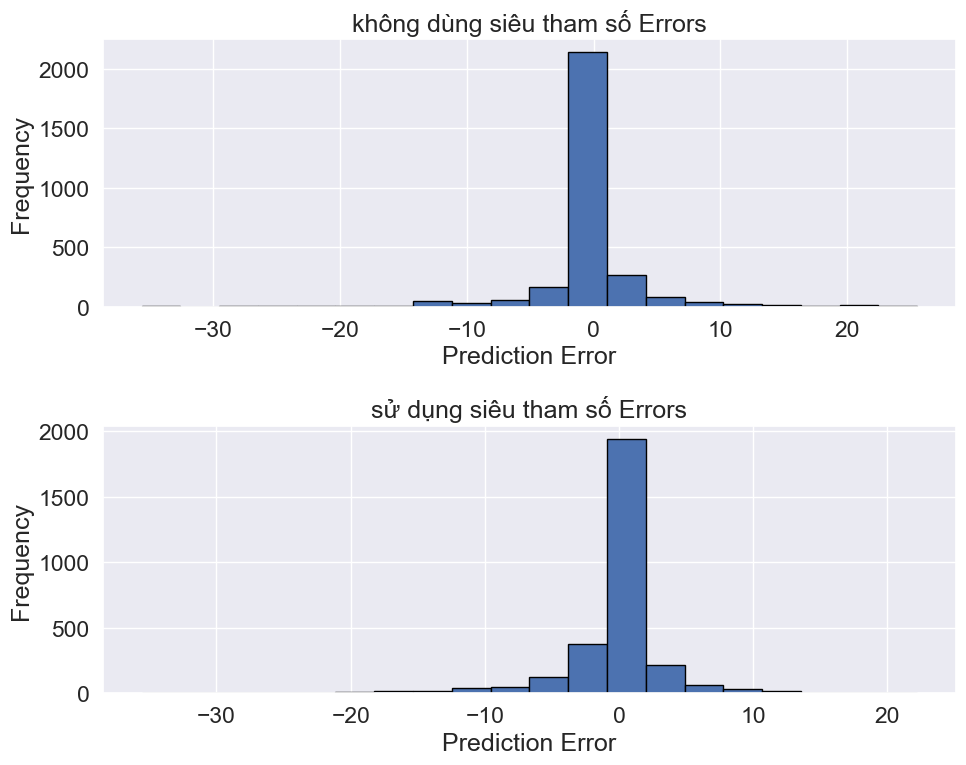

In [412]:
import matplotlib.pyplot as plt

# Tính toán sai số giữa dự đoán và dữ liệu thực tế
errors1 = y_pred_DT - y_test
errors2 = y_pred_DT_stt - y_test

# Tạo khung hình và các trục đồ thị
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Trực quan hóa dữ liệu và dự đoán của mô hình dưới dạng line plot
ax1.hist(errors1, bins=20, edgecolor='black')
ax1.set_xlabel('Prediction Error')
ax1.set_ylabel('Frequency')
ax1.set_title('không dùng siêu tham số Errors')

# Trực quan hóa sai số dưới dạng histogram
ax2.hist(errors2, bins=20, edgecolor='black')
ax2.set_xlabel('Prediction Error')
ax2.set_ylabel('Frequency')
ax2.set_title('sử dụng siêu tham số Errors')

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

# Đánh giá 3 thuật theo các metrics (Đức)

In [413]:
dict = {"linear":[r2_score_LR,rmse_score_LR,mae_score_LR],
        "random_forest":[r2_score_RD,rmse_score_RD,mae_score_RD],
        "decission":[r2_score_DT_stt,rmse_score_DT_stt,mae_score_DT_stt]}
df_scores = pd.DataFrame(dict,index=["R2","RMSE","MAE"])
df_scores

,linear,random_forest,decission
R2,-1.694234,0.752418,0.683838
RMSE,12.085943,3.663724,4.140163
MAE,3.592354,1.732220,2.021956


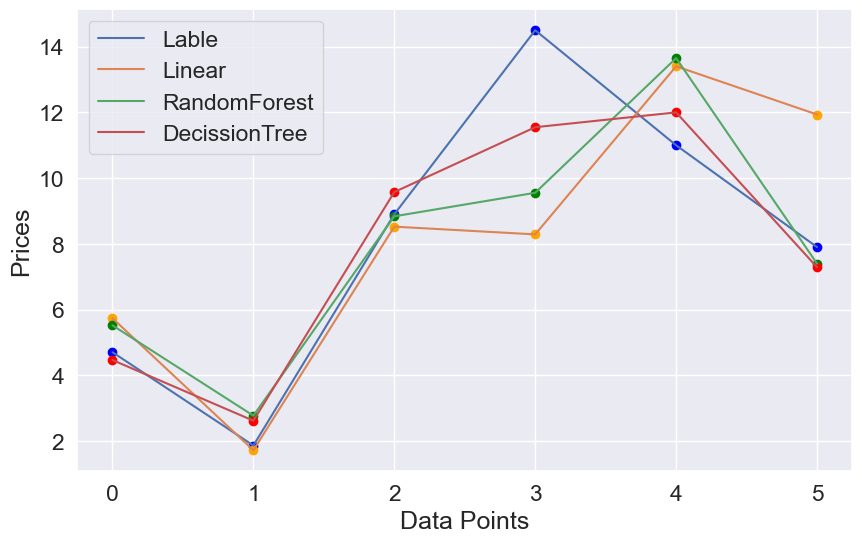

In [414]:
actual = y_test[:6]
linear = y_pred_LR[:6]
random = y_pred_RD_stt[:6]
decission = y_pred_DT_stt[:6]
index = range(6)
plt.figure(figsize=(10,6))
plt.plot(index,actual, label='Lable')
plt.scatter(index, actual, color='blue')

plt.plot(index,linear, label='Linear')
plt.scatter(range(len(linear)), linear, color='orange')

plt.plot(index,random, label='RandomForest')
plt.scatter(range(len(random)), random, color='green')

plt.plot(index,decission, label='DecissionTree')
plt.scatter(range(len(decission)), decission, color='red')

plt.xlabel('Data Points')
plt.ylabel('Prices')

plt.legend()

plt.show()

In [415]:
dict = {"linear":r2_scores_LR,"random_forest":r2_scores_RD,"decission":r2_score_DT_stt}
df_r2 = pd.DataFrame(dict)
df_r2

,linear,random_forest,decission
0,0.467149,0.778355,0.683838
1,0.508992,0.813404,0.683838
2,0.460978,0.771336,0.683838
3,0.469773,0.795924,0.683838
4,0.448858,0.775209,0.683838


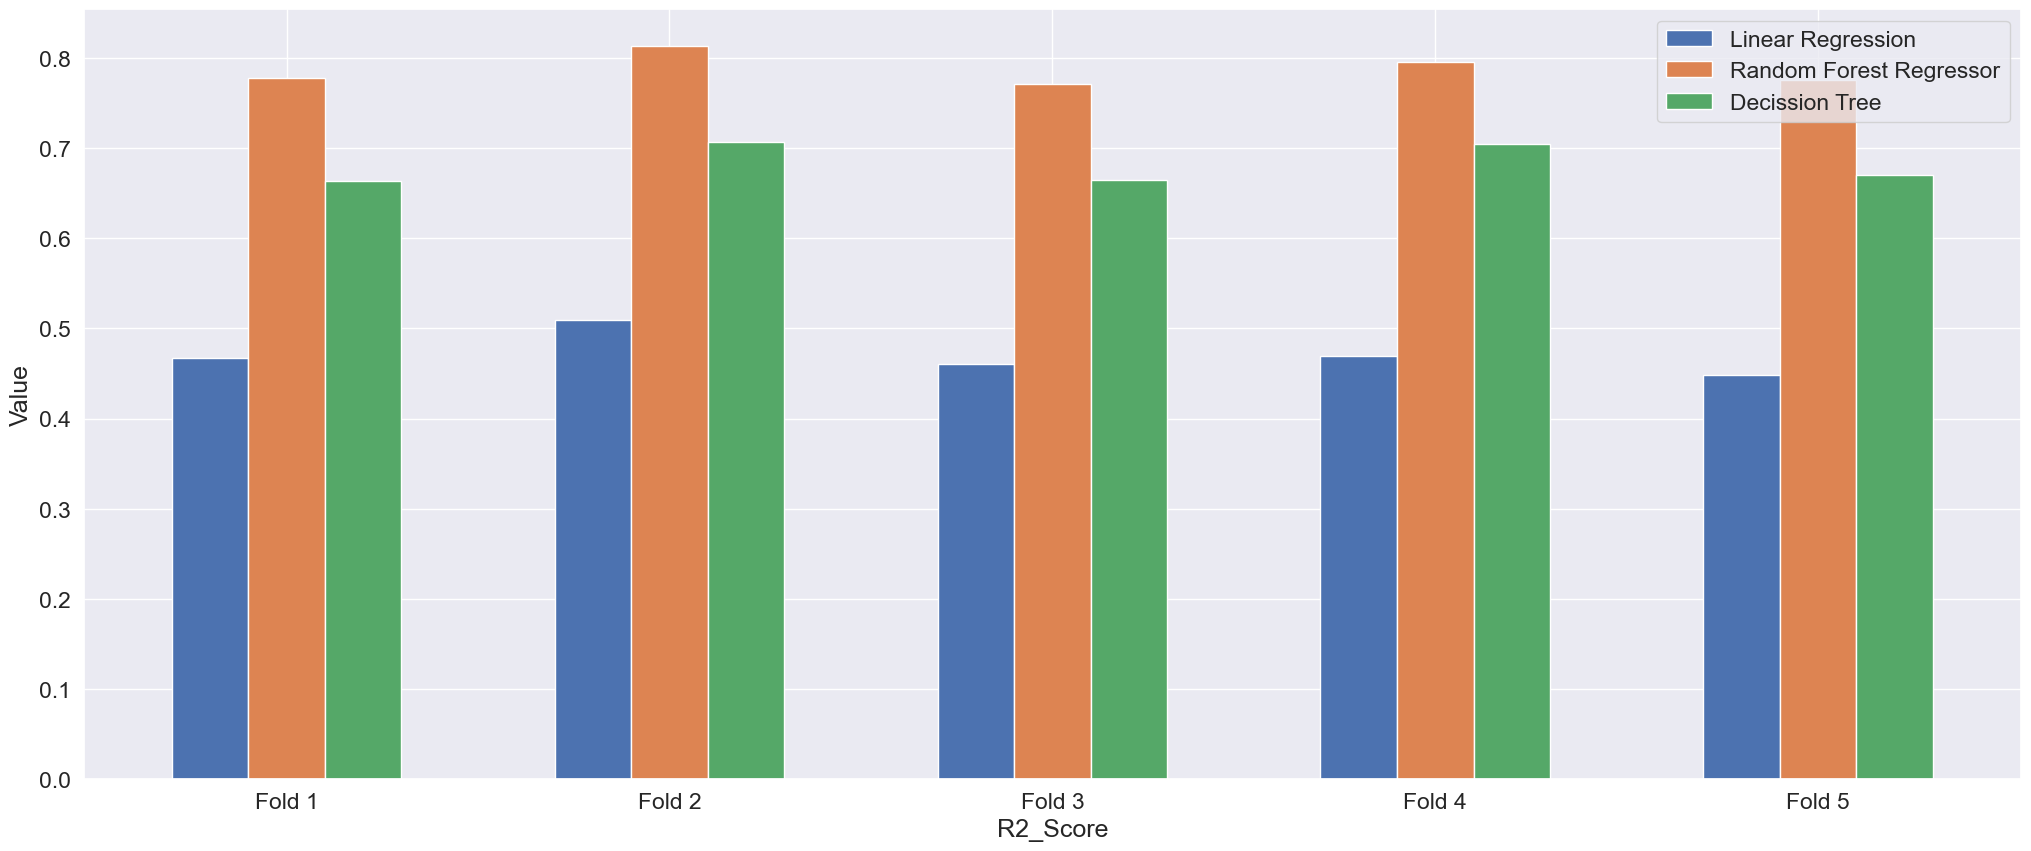

In [416]:
X = ['Fold 1','Fold 2','Fold 3', 'Fold 4','Fold 5']
Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(X))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, r2_scores_LR , 0.2, label = 'Linear Regression')
plt.bar(X_axis , r2_scores_RD, 0.2, label = 'Random Forest Regressor')
plt.bar(X_axis + 0.2, r2_scores_DT_stt, 0.2, label = 'Decission Tree')
  
plt.xticks(X_axis, X)
plt.xlabel("R2_Score")
plt.ylabel("Value")
plt.legend()
plt.show()

In [417]:
dict = {"linear":rmse_scores_LR,"random_forest":rmse_scores_RD,"decission":rmse_score_DT_stt}
df_rmse = pd.DataFrame(dict)
df_rmse

,linear,random_forest,decission
0,20.902996,8.694826,4.140163
1,20.461361,7.775873,4.140163
2,22.538978,9.561477,4.140163
3,23.442861,9.022794,4.140163
4,24.187725,9.865310,4.140163


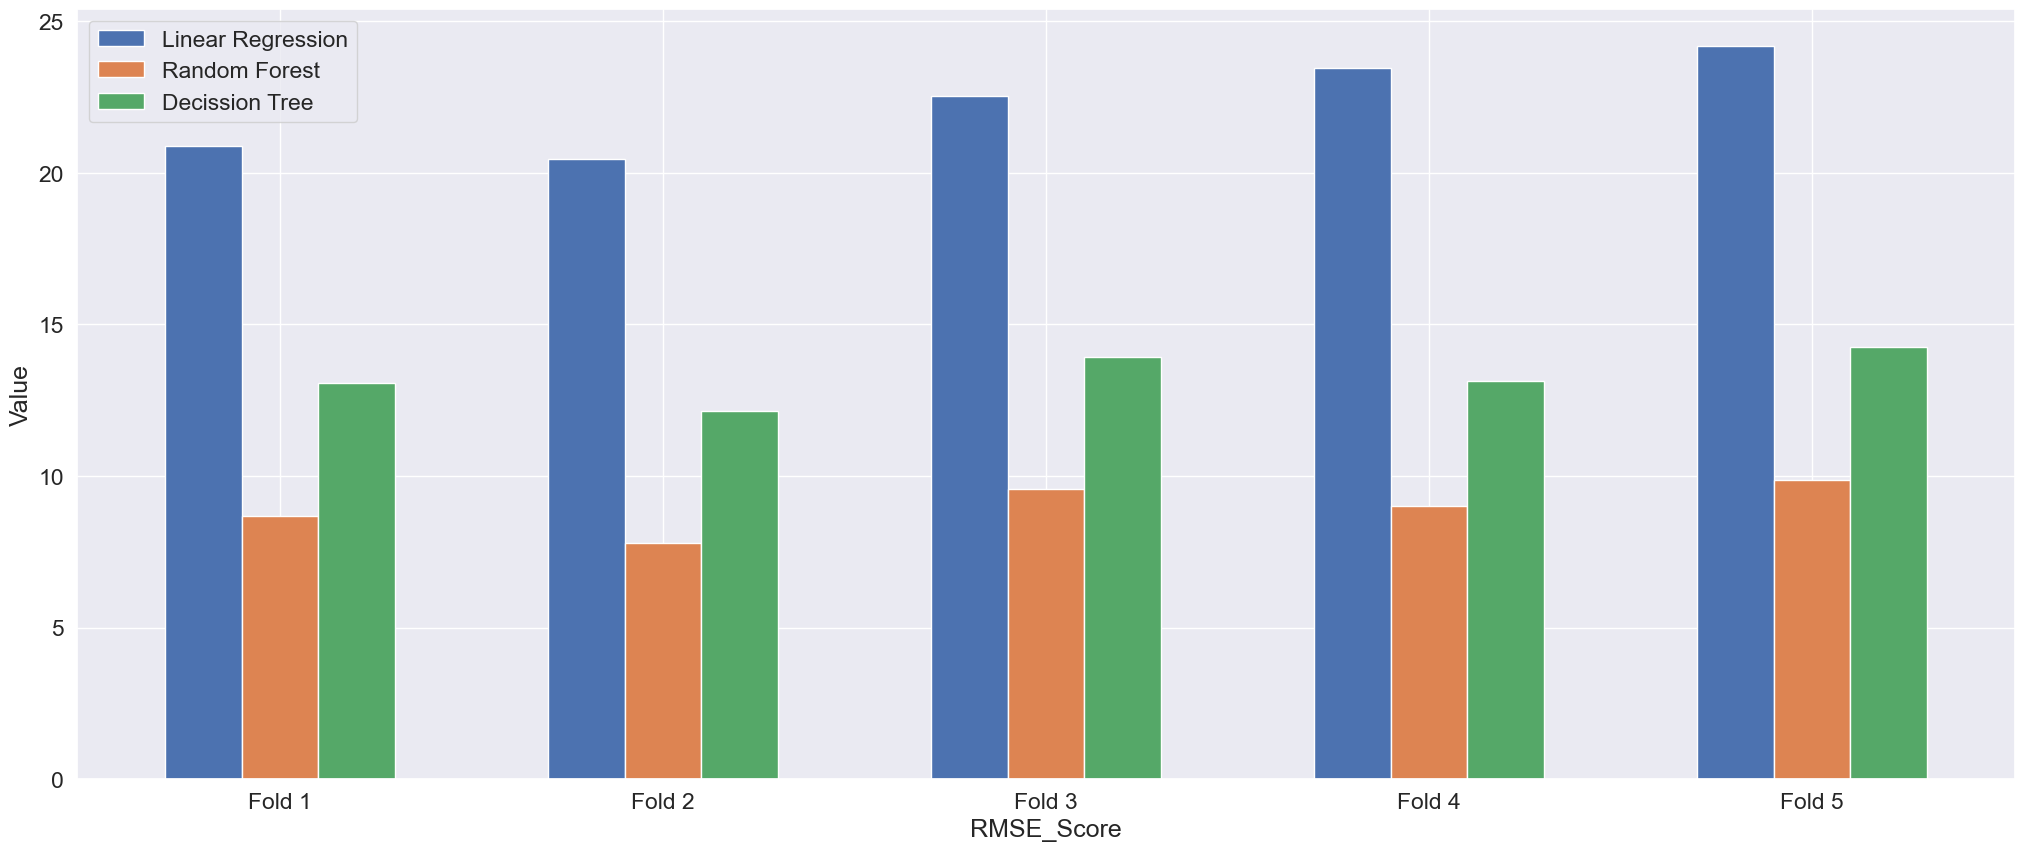

In [418]:
X = ['Fold 1','Fold 2','Fold 3', 'Fold 4','Fold 5']
Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(X))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, rmse_scores_LR , 0.2, label = 'Linear Regression')
plt.bar(X_axis , rmse_scores_RD, 0.2, label = 'Random Forest ')
plt.bar(X_axis + 0.2, rmse_scores_DT_stt, 0.2, label = 'Decission Tree')
  
plt.xticks(X_axis, X)
plt.xlabel("RMSE_Score")
plt.ylabel("Value")
plt.legend()
plt.show()

In [419]:
dict = {"linear":mae_scores_LR,"random_forest":mae_scores_RD,"decission":mae_score_DT_stt}
df_mae = pd.DataFrame(dict)
df_mae

,linear,random_forest,decission
0,3.121789,1.508684,2.021956
1,3.123683,1.453628,2.021956
2,3.230989,1.594018,2.021956
3,3.273909,1.525493,2.021956
4,3.319034,1.534899,2.021956


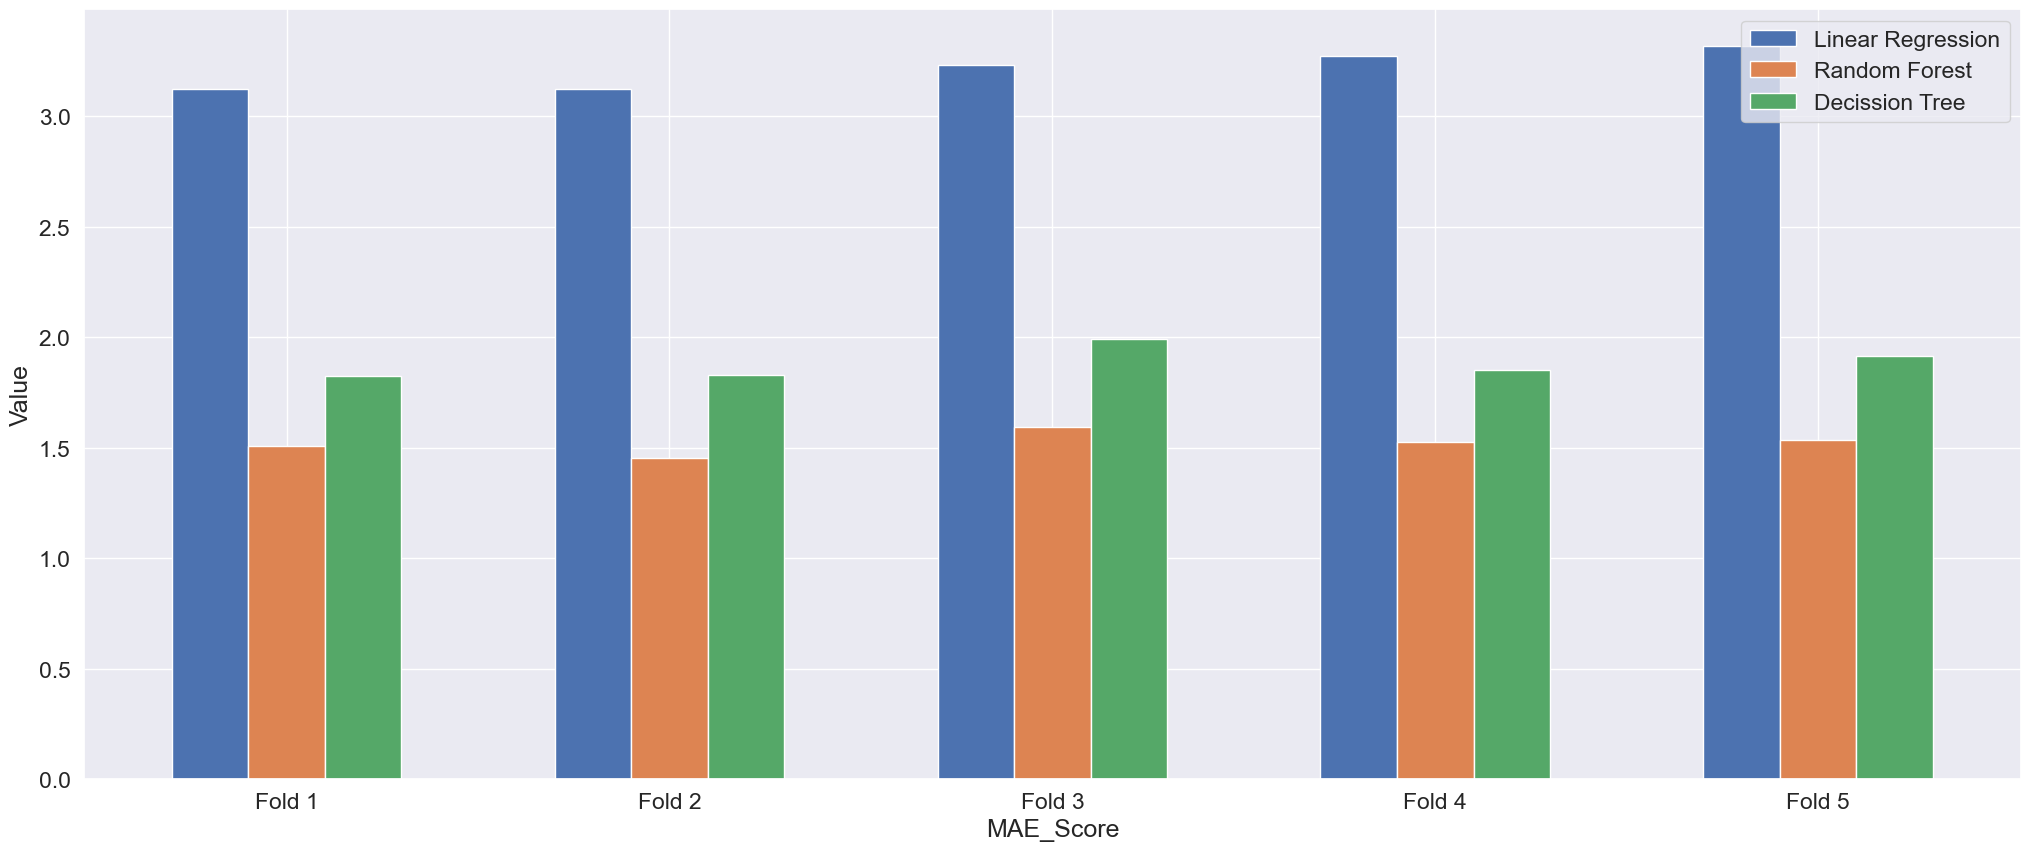

In [420]:
X = ['Fold 1','Fold 2','Fold 3', 'Fold 4','Fold 5']
Ygirls = [10,20,20,40]
Zboys = [20,30,25,30]
  
X_axis = np.arange(len(X))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, mae_scores_LR , 0.2, label = 'Linear Regression')
plt.bar(X_axis , mae_scores_RD, 0.2, label = 'Random Forest ')
plt.bar(X_axis + 0.2, mae_scores_DT_stt, 0.2, label = 'Decission Tree')
  
plt.xticks(X_axis, X)
plt.xlabel("MAE_Score")
plt.ylabel("Value")
plt.legend()
plt.show()

Tương quan giữa prices dự đoán theo mô hình linear regression va thực tế 

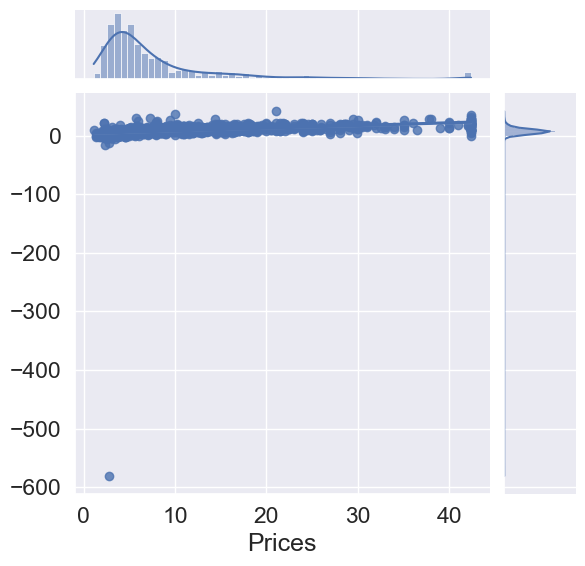

In [443]:
sns.jointplot(x=y_test,y=y_pred_LR,kind='reg')

In [447]:
list(filter(lambda x: x < 0, y_pred_RD))

[]

Tương quan giữa prices dự đoán theo mô hình Random Forest regression va thực tế 

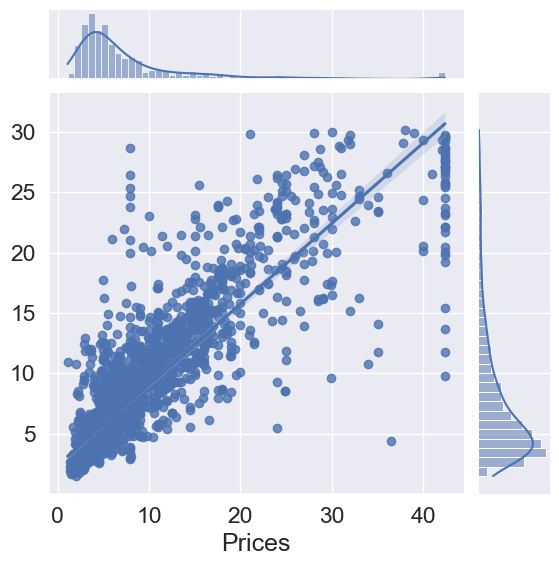

In [444]:
sns.jointplot(x=y_test,y=y_pred_RD_stt,kind='reg')

Tương quan giữa prices dự đoán theo mô hình Decission Tree regression va thực tế 

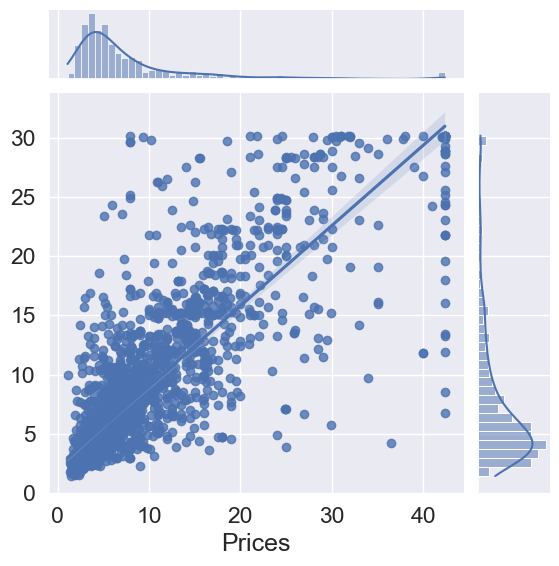

In [448]:
sns.jointplot(x=y_test,y=y_pred_DT_stt,kind='reg')